# Introduction

# Base Model: Closed System

Specifications:
*   Model type: First-order Markov chain
*   States: Harvard stations
*   State variables: Number of bikes available at each station
*   Agents: Renters, arriving in a Poisson process
*   Actions: Moving stations
*   Transition matrix: based on trip data from last year, April 2024
*   Time: discrete, steps of 10 minutes

Assumptions:
1. Trips only go between Harvard stations
2. Trips happen concurrently and *take one time step* (10 minutes)
3. Demand is uniform throughout the day/month
  *   Doesn't matter for our base model, we're not considering time
4. Going to ignore the case when there's no dock at a station
  *   We don't care to minimize this, it has no impact on revenue (if so, a positive one)
  *   By maximizing the number of trips (or revenue), we're inherently minimizing the number of idle bikes
  *   In actuality, there are also more docks than bikes to prevent this

12 stations:
- Harvard Stadium: N. Harvard St at Soldiers Field Rd
- Harvard Kennedy School at Bennett St / Eliot St
- Harvard Square at Brattle St / Eliot St
- Harvard University River Houses at DeWolfe St / Cowperthwaite St
- Harvard Square at Mass Ave/ Dunster
- Church St
- Verizon Innovation Hub 10 Ware Street
- Harvard University Gund Hall at Quincy St / Kirkland St
- Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St (this one is right next to class)
- Harvard Law School at Mass Ave / Jarvis St
- Harvard University Radcliffe Quadrangle at Shepard St / Garden St
- Innovation Lab - 125 Western Ave at Batten Way

Let's not use this one, it's close but not on campus, serves the library and the Latin School:
- Cambridge Main Library at Broadway / Trowbridge St

## Why Our Time Steps Are 10 Minutes Each
It's the closest factor of an hour (60 minutes) to the average trip length between Harvard stations of 9.96 minutes

In [ ]:
import pandas as pd

# 12 stations we will look at
stations_of_interest = sorted([
    'Harvard Stadium: N. Harvard St at Soldiers Field Rd',
    'Harvard Kennedy School at Bennett St / Eliot St',
    'Harvard Square at Brattle St / Eliot St',
    'Harvard University River Houses at DeWolfe St / Cowperthwaite St',
    'Harvard Square at Mass Ave/ Dunster',
    'Church St',
    'Verizon Innovation Hub 10 Ware Street',
    'Harvard University Gund Hall at Quincy St / Kirkland St',
    'Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St',
    'Harvard Law School at Mass Ave / Jarvis St',
    'Harvard University Radcliffe Quadrangle at Shepard St / Garden St',
    'Innovation Lab - 125 Western Ave at Batten Way'
])

file_path = '202404-bluebikes-tripdata.csv'
df = pd.read_csv(file_path)

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at']   = pd.to_datetime(df['ended_at'])

# ride duration
df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

df_filtered = df[
    df['start_station_name'].isin(stations_of_interest) &
    df['end_station_name'].isin(stations_of_interest)
]

# only positive durations
df_filtered = df_filtered[df_filtered['ride_duration_minutes'] > 0]

# finding the average ride duration
average_duration = df_filtered['ride_duration_minutes'].mean()

print(f"Average ride duration between stations of interest: {average_duration:.2f} minutes")

Average ride duration between stations of interest: 9.96 minutes


In [ ]:
import pandas as pd

# dispaly options for better data visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

file_path = '202404-bluebikes-tripdata.csv'
df = pd.read_csv(file_path)

# 12 stations of interest
stations_of_interest = sorted([
    'Harvard Stadium: N. Harvard St at Soldiers Field Rd',
    'Harvard Kennedy School at Bennett St / Eliot St',
    'Harvard Square at Brattle St / Eliot St',
    'Harvard University River Houses at DeWolfe St / Cowperthwaite St',
    'Harvard Square at Mass Ave/ Dunster',
    'Church St',
    'Verizon Innovation Hub 10 Ware Street',
    'Harvard University Gund Hall at Quincy St / Kirkland St',
    'Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St',
    'Harvard Law School at Mass Ave / Jarvis St',
    'Harvard University Radcliffe Quadrangle at Shepard St / Garden St',
    'Innovation Lab - 125 Western Ave at Batten Way'
])

# only looking at rides where both start and end stations are of interest
filtered_df = df[df['start_station_name'].isin(stations_of_interest) & df['end_station_name'].isin(stations_of_interest)]

# datetime for easier calculations
filtered_df['started_at'] = pd.to_datetime(filtered_df['started_at'])
filtered_df['ended_at'] = pd.to_datetime(filtered_df['ended_at'])

# finding the length of rides in seconds
filtered_df['ride_duration'] = (filtered_df['ended_at'] - filtered_df['started_at']).dt.total_seconds()

rides_count = filtered_df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')

# averages, and standard deviations
ride_stats = filtered_df.groupby(['start_station_name', 'end_station_name'])['ride_duration'].agg(
    average_ride_duration='mean',
    ride_duration_std_dev='std'
).reset_index()

# chaning the units of time to minutes
ride_stats['average_ride_duration'] = ride_stats['average_ride_duration'] / 60
ride_stats['ride_duration_std_dev'] = ride_stats['ride_duration_std_dev'] / 60

result_df = pd.merge(rides_count, ride_stats, on=['start_station_name', 'end_station_name'])

print(result_df)



                                    start_station_name                                   end_station_name  ride_count  average_ride_duration  ride_duration_std_dev
0                                            Church St                                          Church St          20                  15.04                  22.85
1                                            Church St    Harvard Kennedy School at Bennett St / Eliot St           7                   8.35                  12.47
2                                            Church St         Harvard Law School at Mass Ave / Jarvis St           7                  14.41                  26.34
3                                            Church St            Harvard Square at Brattle St / Eliot St          12                  29.00                  34.74
4                                            Church St                Harvard Square at Mass Ave/ Dunster          15                  15.24                  13.62
5               

<ipython-input-261-1e2cb21ea7bc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['started_at'] = pd.to_datetime(filtered_df['started_at'])
<ipython-input-261-1e2cb21ea7bc>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ended_at'] = pd.to_datetime(filtered_df['ended_at'])
<ipython-input-261-1e2cb21ea7bc>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# Finding the probabilities to go from a station of interest to another station of interest

In [ ]:
ride_counts = filtered_df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')

total_rides_per_start = ride_counts.groupby('start_station_name')['ride_count'].sum()

ride_counts = pd.merge(ride_counts, total_rides_per_start, on='start_station_name', suffixes=('', '_total'))

# probability of each par
ride_counts['probability'] = ride_counts['ride_count'] / ride_counts['ride_count_total']

# creating the dataframe
probability_df = ride_counts.pivot(index='start_station_name', columns='end_station_name', values='probability')

print(probability_df)

end_station_name                                    Church St  Harvard Kennedy School at Bennett St / Eliot St  Harvard Law School at Mass Ave / Jarvis St  Harvard Square at Brattle St / Eliot St  Harvard Square at Mass Ave/ Dunster  Harvard Stadium: N. Harvard St at Soldiers Field Rd  Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St  Harvard University Gund Hall at Quincy St / Kirkland St  Harvard University Radcliffe Quadrangle at Shepard St / Garden St  Harvard University River Houses at DeWolfe St / Cowperthwaite St  Innovation Lab - 125 Western Ave at Batten Way  Verizon Innovation Hub 10 Ware Street
start_station_name                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
transition_matrix = probability_df.values

print(transition_matrix)

[[0.10638298 0.03723404 0.03723404 0.06382979 0.07978723 0.06914894
  0.01595745 0.03191489 0.37234043 0.11702128 0.05319149 0.01595745]
 [0.01069519 0.17647059 0.09358289 0.04812834 0.05614973 0.11229947
  0.03475936 0.09090909 0.09625668 0.18983957 0.07219251 0.01871658]
 [0.04225352 0.17183099 0.10985915 0.11267606 0.16056338 0.08169014
  0.04225352 0.04507042 0.05633803 0.07605634 0.06760563 0.03380282]
 [0.03343465 0.05167173 0.04863222 0.20668693 0.03951368 0.0668693
  0.04559271 0.04863222 0.23708207 0.1337386  0.04863222 0.03951368]
 [0.01477378 0.02862419 0.07386888 0.03139428 0.12188366 0.1043398
  0.06555863 0.04432133 0.3056325  0.11357341 0.07663897 0.01939058]
 [0.02105263 0.08631579 0.06105263 0.05684211 0.14526316 0.13052632
  0.03789474 0.04631579 0.19368421 0.16421053 0.02736842 0.02947368]
 [0.02083333 0.05208333 0.02864583 0.0625     0.1640625  0.06770833
  0.07552083 0.03645833 0.109375   0.22395833 0.10416667 0.0546875 ]
 [0.02332362 0.13119534 0.03206997 0.067055

## Finding Probabilities

1. We need the total number of trips between stations of interests
2. Divide those by the number of time steps in the month of April due to BlueBikes being 24/7
3. Form a 1D array where each entry $i$ is the probability for a renter to take a bike at station $i$ for a trip

In [ ]:
# We are dividing the total number of rides from a start station by 4320,
# the number of 10-minute periods in the month of April as this is our unit of time
lambdas = df[df['start_station_name'].isin(stations_of_interest) & df['end_station_name'].isin(stations_of_interest)]

# Step 2: Count the occurrences of each start station in the filtered DataFrame and divide by 4320 (to get the rate)
lambdas = lambdas['start_station_name'].value_counts() / (24 * 6 * 30)
lambdas = lambdas.reindex(stations_of_interest).fillna(0)

print(lambdas)

start_station_name
Church St                                                           0.04
Harvard Kennedy School at Bennett St / Eliot St                     0.09
Harvard Law School at Mass Ave / Jarvis St                          0.08
Harvard Square at Brattle St / Eliot St                             0.08
Harvard Square at Mass Ave/ Dunster                                 0.25
Harvard Stadium: N. Harvard St at Soldiers Field Rd                 0.11
Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St        0.09
Harvard University Gund Hall at Quincy St / Kirkland St             0.08
Harvard University Radcliffe Quadrangle at Shepard St / Garden St   0.21
Harvard University River Houses at DeWolfe St / Cowperthwaite St    0.22
Innovation Lab - 125 Western Ave at Batten Way                      0.09
Verizon Innovation Hub 10 Ware Street                               0.05
Name: count, dtype: float64


# Single Simulation Example

In [ ]:
import numpy as np
import pandas as pd


# ================================
#          PARAMETERS
# ================================
NUM_STATIONS = 12
NUM_BIKES = 12 * 5
SIM_TIME = 24 * 6 # One day in 10-minute intervals
np.random.seed(7)  # for reproducibility

# A simple revenue model
REVENUE_PER_RIDE = 3.00

# ================================
#         INITIAL STATES
# ================================
station_states0 = np.full(NUM_STATIONS, NUM_BIKES // NUM_STATIONS, dtype=int)
station_states = np.full(NUM_STATIONS, NUM_BIKES // NUM_STATIONS, dtype=int)

# ================================
#  TRACKING METRICS (PER STATION)
# ================================
successful_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)
missed_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)

# We can also track total system-wide if we want:
total_revenue = 0.0

# ================================
#      MAIN SIMULATION LOOP
# ================================
for t in range(SIM_TIME):
    print(f"--- Time t = {t} ---")
    print("Stations:", station_states)
    print("Net change:", station_states - station_states0)

    # 1) RENTERS ARRIVE
    # Use the lambda value for each station


    for i in range(NUM_STATIONS):
        renter_arrival = np.random.poisson(lambdas[i])
        if renter_arrival > 0:
            bikes_available = station_states[i]

            # how many succeed vs fail
            successes = min(renter_arrival, bikes_available)
            fails = renter_arrival - successes

            # remove bikes for successful rentals
            station_states[i] -= successes

            # update station-level counters
            successful_rentals_per_station[i] += successes
            missed_rentals_per_station[i] += fails

            # track revenue: each success yields $3
            station_revenue = successes * REVENUE_PER_RIDE
            total_revenue += station_revenue

            # now each success chooses a destination (instant transition)
            if successes > 0:
                dest_counts = np.random.multinomial(successes, transition_matrix[i])
                for j in range(NUM_STATIONS):
                    if dest_counts[j] > 0:
                        # Move bikes immediately to the new stations
                        station_states[j] += dest_counts[j]

# ================================
#  END OF SIMULATION
# ================================
print("\n=== Final State After Simulation ===")
print(f"Time = {SIM_TIME}")
print("Stations:", station_states)
print("Net change:", station_states - station_states0)


# Summaries
print("\n=== Rental Statistics by Station ===")
print("Station | Successful | Missed | Potential Lost Revenue")
for i in range(NUM_STATIONS):
    successful = successful_rentals_per_station[i]
    missed = missed_rentals_per_station[i]
    lost_revenue = missed * REVENUE_PER_RIDE
    print(f"{i:7d} | {successful:10d} | {missed:6d} | ${lost_revenue:7.2f}")

# System-wide stats
total_successful = successful_rentals_per_station.sum()
total_missed = missed_rentals_per_station.sum()
print("\n=== System-wide Stats ===")
print(f"Total Successful Rentals: {total_successful}")
print(f"Total Missed Rentals: {total_missed}")
print(f"Failure Rate: {100.0 * total_missed/(total_missed + total_successful):.2f}%")
print(f"\nRevenue per Ride: ${REVENUE_PER_RIDE:.2f}")
print(f"Total Revenue: ${total_revenue:.2f}")


--- Time t = 0 ---
Stations: [5 5 5 5 5 5 5 5 5 5 5 5]
Net change: [0 0 0 0 0 0 0 0 0 0 0 0]
--- Time t = 1 ---
Stations: [5 6 5 5 5 4 5 5 5 5 5 5]
Net change: [ 0  1  0  0  0 -1  0  0  0  0  0  0]
--- Time t = 2 ---
Stations: [5 6 5 5 5 3 5 5 5 6 5 5]
Net change: [ 0  1  0  0  0 -2  0  0  0  1  0  0]
--- Time t = 3 ---
Stations: [5 6 5 5 5 3 5 5 5 6 5 5]
Net change: [ 0  1  0  0  0 -2  0  0  0  1  0  0]
--- Time t = 4 ---
Stations: [5 6 5 5 5 3 5 6 5 5 5 5]
Net change: [ 0  1  0  0  0 -2  0  1  0  0  0  0]
--- Time t = 5 ---
Stations: [5 7 4 5 5 3 5 6 5 5 5 5]
Net change: [ 0  2 -1  0  0 -2  0  1  0  0  0  0]
--- Time t = 6 ---
Stations: [5 7 4 5 5 3 5 6 5 5 5 5]
Net change: [ 0  2 -1  0  0 -2  0  1  0  0  0  0]
--- Time t = 7 ---
Stations: [5 7 5 5 3 4 5 6 5 5 5 5]
Net change: [ 0  2  0  0 -2 -1  0  1  0  0  0  0]
--- Time t = 8 ---
Stations: [5 7 5 5 3 4 5 6 5 5 5 5]
Net change: [ 0  2  0  0 -2 -1  0  1  0  0  0  0]
--- Time t = 9 ---
Stations: [5 7 5 5 2 5 5 6 5 5 5 5]
Net change: 

<ipython-input-265-29356b8b55c2>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renter_arrival = np.random.poisson(lambdas[i])


# Average of 100 simulations with standard deviations

We start with an arbitrarily large number of bikes to avoid missed opportunities: we want to choose an initial arrangement of bikes such that there are no missed opportunities.

In [ ]:
import numpy as np
import pandas as pd

# ================================
#          PARAMETERS
# ================================
NUM_STATIONS = 12
NUM_BIKES = 12 * 100
SIM_TIME = 24 * 6  # One day in 10-minute intervals
NUM_RUNS = 100     # Number of simulations
np.random.seed(0)  # for reproducibility

REVENUE_PER_RIDE = 3.00

# ================================
#         INITIAL STATES
# ================================
station_states0 = np.full(NUM_STATIONS, NUM_BIKES // NUM_STATIONS, dtype=int)
station_states = np.full(NUM_STATIONS, NUM_BIKES // NUM_STATIONS, dtype=int)

# ================================
#  ACCUMULATED METRICS (ACROSS RUNS)
# ================================
total_successful_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)
total_missed_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)
total_revenue = 0.0

# Store per-run station states and net changes
all_net_changes = np.zeros((NUM_RUNS, SIM_TIME, NUM_STATIONS))
all_station_states = np.zeros((NUM_RUNS, SIM_TIME, NUM_STATIONS))

# ================================
#      MAIN SIMULATION LOOP
# ================================
for run in range(NUM_RUNS):
    print(f"Running simulation {run + 1}/{NUM_RUNS}...")

    station_states = np.full(NUM_STATIONS, NUM_BIKES // NUM_STATIONS, dtype=int)
    station_states0 = station_states.copy()

    successful_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)
    missed_rentals_per_station = np.zeros(NUM_STATIONS, dtype=int)

    net_changes = np.zeros((SIM_TIME, NUM_STATIONS))

    for t in range(SIM_TIME):
        all_station_states[run, t] = station_states
        net_changes[t] = station_states - station_states0

        for i in range(NUM_STATIONS):
            renter_arrival = np.random.poisson(lambdas[i])
            if renter_arrival > 0:
                bikes_available = station_states[i]
                successes = min(renter_arrival, bikes_available)
                fails = renter_arrival - successes

                station_states[i] -= successes
                successful_rentals_per_station[i] += successes
                missed_rentals_per_station[i] += fails

                station_revenue = successes * REVENUE_PER_RIDE
                total_revenue += station_revenue

                if successes > 0:
                    dest_counts = np.random.multinomial(successes, transition_matrix[i])
                    for j in range(NUM_STATIONS):
                        station_states[j] += dest_counts[j]

        all_net_changes[run, t] = net_changes[t]

    # Accumulate across runs
    total_successful_rentals_per_station += successful_rentals_per_station
    total_missed_rentals_per_station += missed_rentals_per_station

# ================================
#  END OF SIMULATION
# ================================
print("\n=== Final State After Simulation ===")
print(f"Time = {SIM_TIME}")
print("Stations (Final Run):", station_states)

# ================================
# SUMMARIES (ACROSS ALL RUNS)
# ================================
print("\n=== Rental Statistics by Station (Total Across 100 Runs) ===")
print("Station | Successful | Missed | Potential Lost Revenue")
for i in range(NUM_STATIONS):
    successful = total_successful_rentals_per_station[i]
    missed = total_missed_rentals_per_station[i]
    lost_revenue = missed * REVENUE_PER_RIDE
    print(f"{i:7d} | {successful:10d} | {missed:6d} | ${lost_revenue:7.2f}")

# System-wide stats
total_successful = total_successful_rentals_per_station.sum()
total_missed = total_missed_rentals_per_station.sum()
failure_rate = 100.0 * total_missed / (total_missed + total_successful)

print("\n=== System-wide Stats (Across 100 Runs) ===")
print(f"Total Successful Rentals: {total_successful}")
print(f"Total Missed Rentals:     {total_missed}")
print(f"Failure Rate:             {failure_rate:.2f}%")
print(f"Revenue per Ride:         ${REVENUE_PER_RIDE:.2f}")
print(f"Total Revenue:            ${total_revenue:.2f}")

# ================================
# AVERAGE AND STANDARD DEVIATION OF NET CHANGES
# ================================
average_net_change = np.mean(all_net_changes, axis=0)
std_dev_net_change = np.std(all_net_changes, axis=0)

print("\n=== Average and Standard Deviation of Net Change (Across 100 Runs) ===")
for t in range(SIM_TIME):
    print(f"Time {t}:")
    for i in range(NUM_STATIONS):
        avg_change = average_net_change[t, i]
        std_dev_change = std_dev_net_change[t, i]
        print(f"  Station {i}: Avg = {avg_change:7.2f}, Std Dev = {std_dev_change:7.2f}")

# ================================
# AVERAGE FINAL STATION STATE
# ================================
average_station_states = np.mean(all_station_states, axis=0)

print("\n=== Average Number of Bikes at Each Station After 100 Simulations ===")
for i in range(NUM_STATIONS):
    avg_bikes = average_station_states[-1, i]
    print(f"Station {i}: Average Bikes = {avg_bikes:.2f}")

Running simulation 1/100...
Running simulation 2/100...
Running simulation 3/100...
Running simulation 4/100...
Running simulation 5/100...
Running simulation 6/100...
Running simulation 7/100...


<ipython-input-266-5343ec0ff834>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renter_arrival = np.random.poisson(lambdas[i])


Running simulation 8/100...
Running simulation 9/100...
Running simulation 10/100...
Running simulation 11/100...
Running simulation 12/100...
Running simulation 13/100...
Running simulation 14/100...
Running simulation 15/100...
Running simulation 16/100...
Running simulation 17/100...
Running simulation 18/100...
Running simulation 19/100...
Running simulation 20/100...
Running simulation 21/100...
Running simulation 22/100...
Running simulation 23/100...
Running simulation 24/100...
Running simulation 25/100...
Running simulation 26/100...
Running simulation 27/100...
Running simulation 28/100...
Running simulation 29/100...
Running simulation 30/100...
Running simulation 31/100...
Running simulation 32/100...
Running simulation 33/100...
Running simulation 34/100...
Running simulation 35/100...
Running simulation 36/100...
Running simulation 37/100...
Running simulation 38/100...
Running simulation 39/100...
Running simulation 40/100...
Running simulation 41/100...
Running simulati

## Unconstrained Optimization

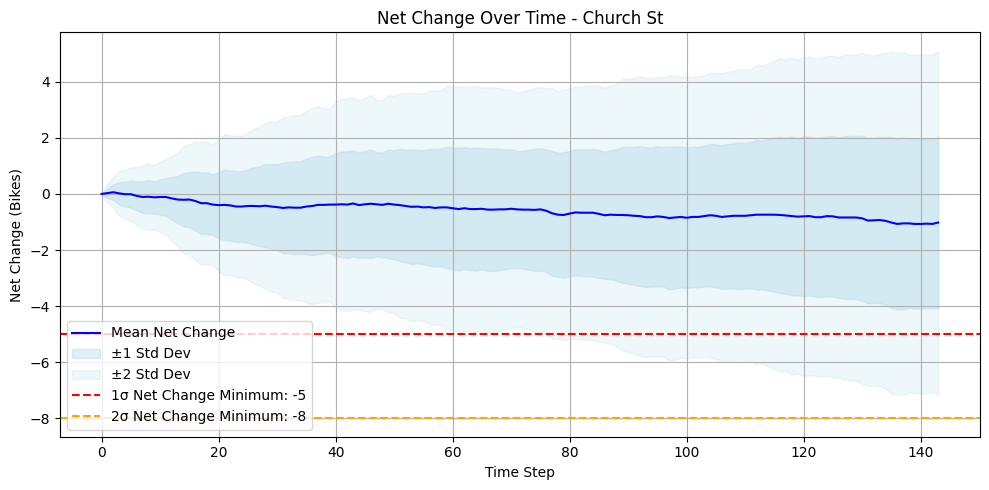

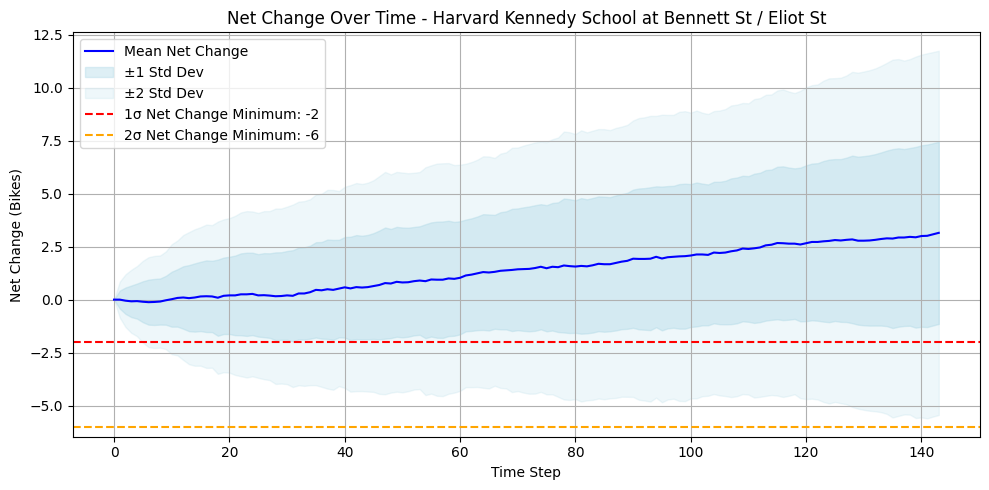

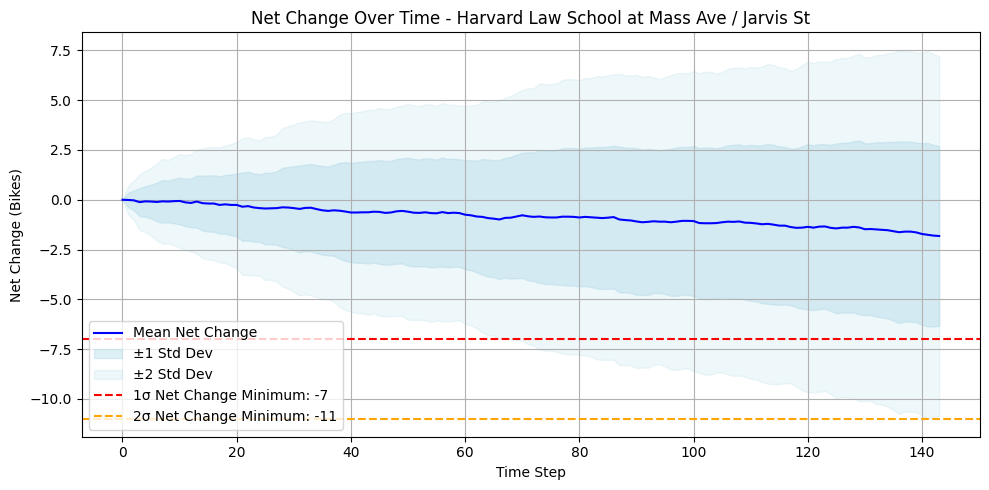

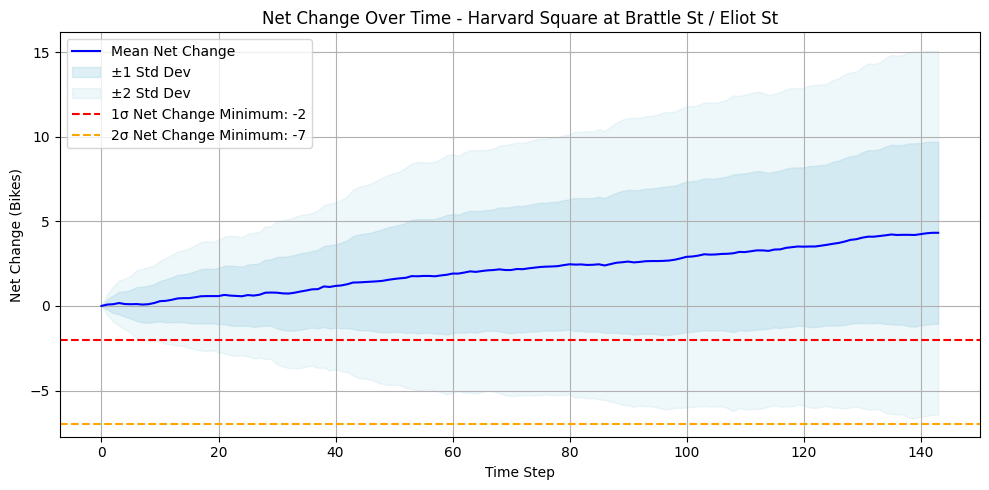

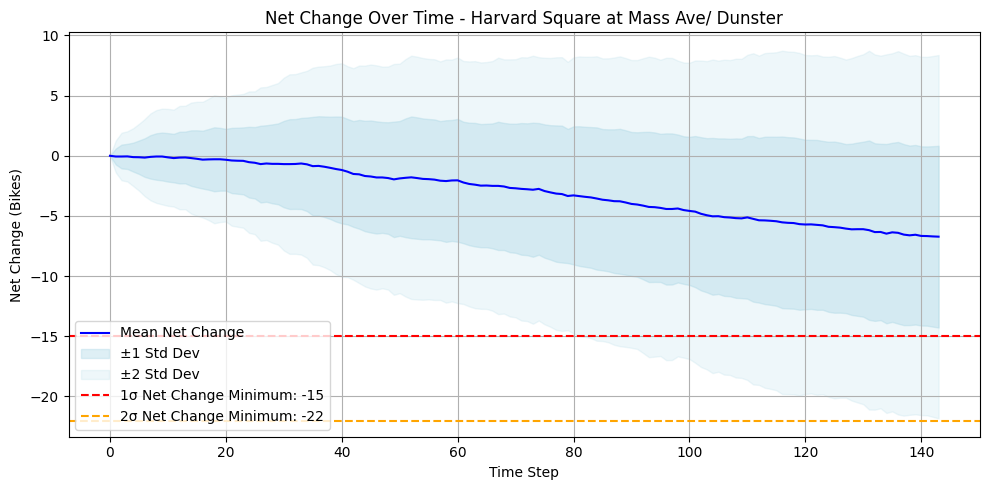

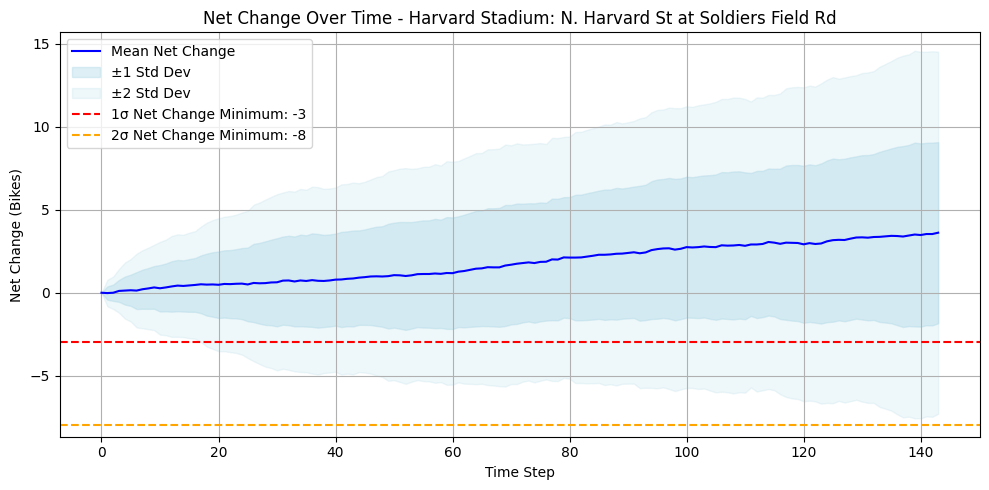

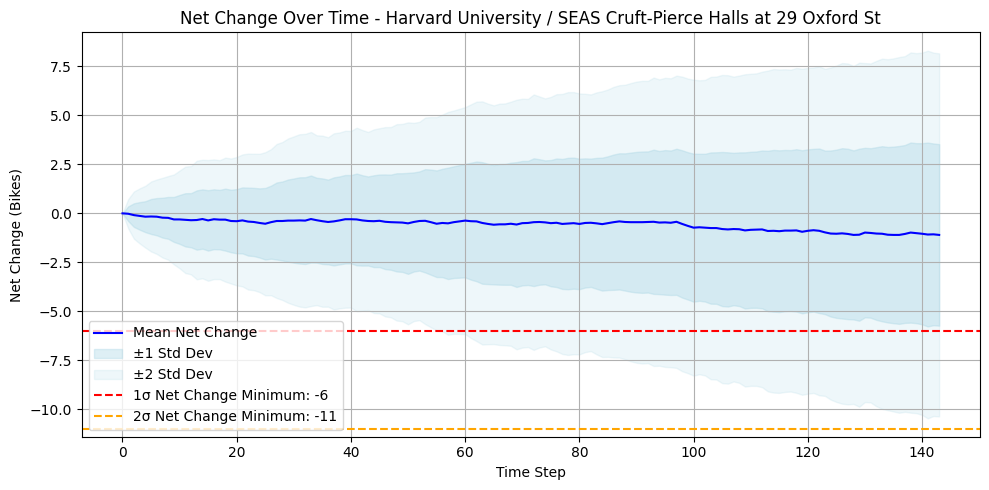

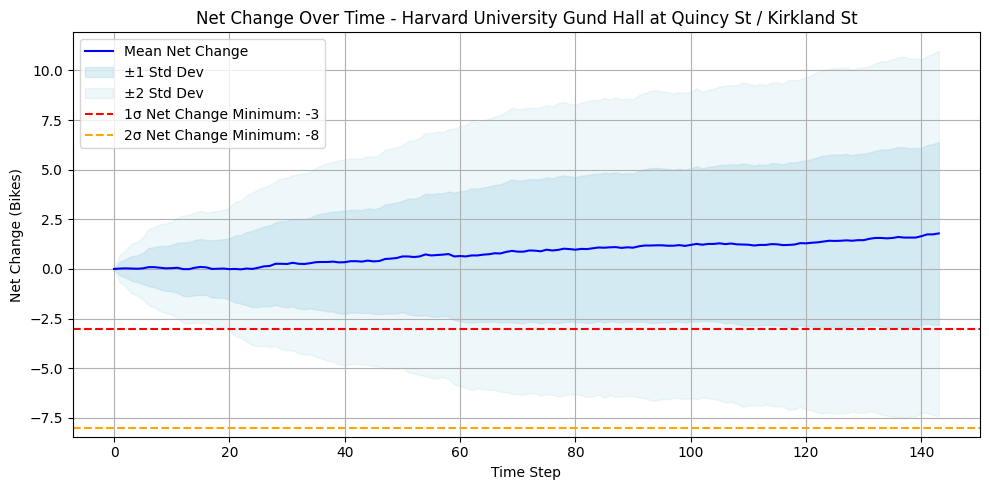

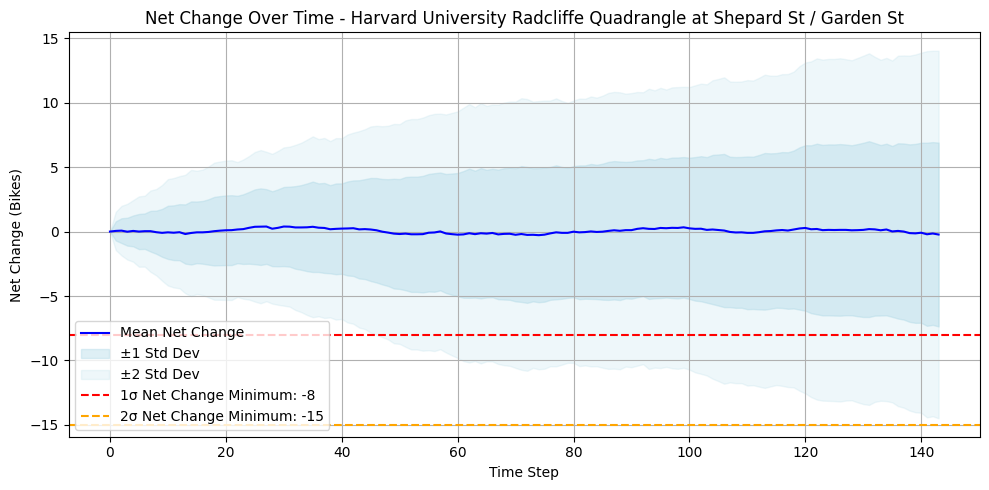

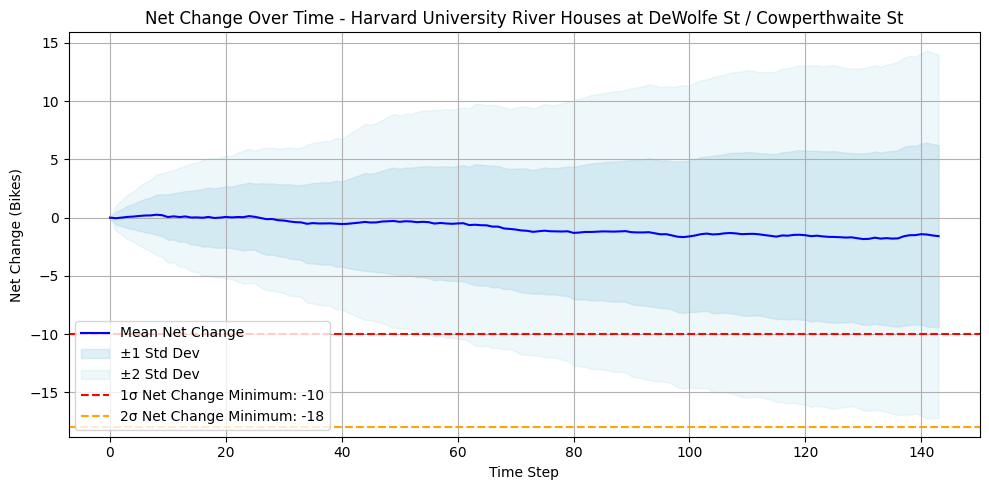

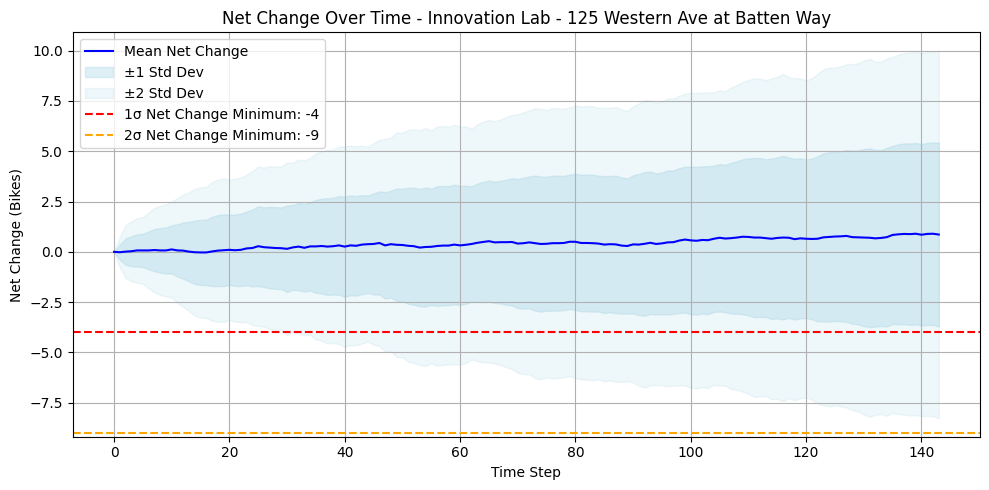

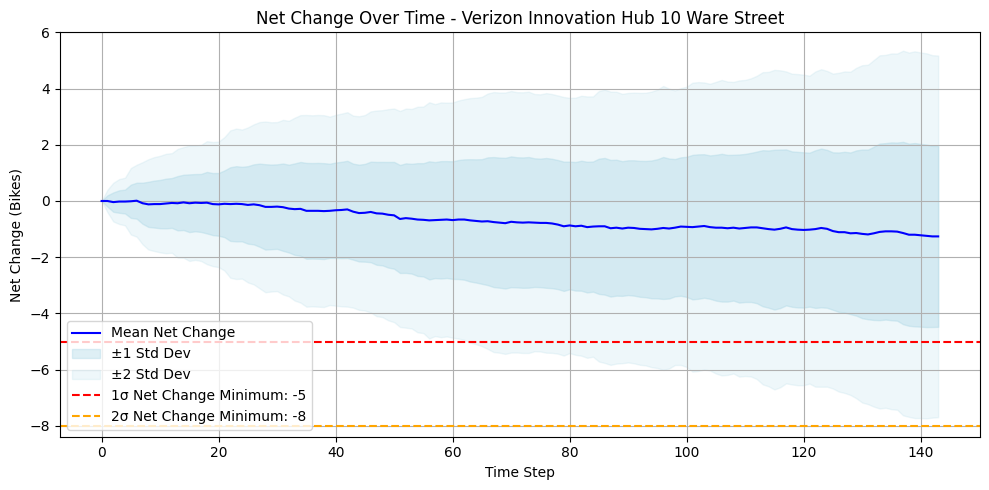

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import floor

# === Assumed inputs ===
# average_net_change: shape (SIM_TIME, NUM_STATIONS)
# std_dev_net_change: shape (SIM_TIME, NUM_STATIONS)
# lambdas: a pandas Series or list of station names in the same order
# SIM_TIME, NUM_STATIONS: integers

for station_id in range(NUM_STATIONS):
    plt.figure(figsize=(10, 5))

    mean_net_change = average_net_change[:, station_id]
    std_net_change = std_dev_net_change[:, station_id]
    time_range = range(SIM_TIME)

    min_net_change_minus_std = floor((mean_net_change - std_net_change).min())
    min_net_change_minus_2std = floor((mean_net_change - 2 * std_net_change).min())

    plt.plot(time_range, mean_net_change, label='Mean Net Change', color='blue')
    plt.fill_between(time_range, mean_net_change - std_net_change, mean_net_change + std_net_change,
                     color='lightblue', alpha=0.4, label='±1 Std Dev')
    plt.fill_between(time_range, mean_net_change - 2 * std_net_change, mean_net_change + 2 * std_net_change,
                     color='lightblue', alpha=0.2, label='±2 Std Dev')
    plt.axhline(y=min_net_change_minus_std, color='red', linestyle='--',
                label=f'1σ Net Change Minimum: {min_net_change_minus_std}')
    plt.axhline(y=min_net_change_minus_2std, color='orange', linestyle='--',
                label=f'2σ Net Change Minimum: {min_net_change_minus_2std}')

    plt.title(f"Net Change Over Time - {lambdas.index[station_id]}")
    plt.xlabel('Time Step')
    plt.ylabel('Net Change (Bikes)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Considering the minimum value each station's net change reached within both one and two standard deviation spreads, we found that it takes 70 bikes to reasonably cover the daily trips between the 12 Harvard stations and 131 bikes to virtually completely cover the daily trips.

For any given station, we essentially sought to estimate the lowest net change value its z-scores of -1 and -2 reached over the course of the simulation. If we set the initial number of bikes to be the additive inverse of this net change minimum for an arbitrary simulation, any net change path that goes below this minimum will result in a missed rental opportunity where the BlueBikes station won't have enough bikes.

Underneath, we wrote code to evaluate its empirical reliability of covering ALL rentals over our 100 simulations, qualifying it as a metric for determining the initial number of bikes that each station needs.

Note: The $\min(\mu - \sigma)$ calculation always results in a negative float, so we took the floor of this to get a more generous integer estimate for the number of bikes we'll need at that station. Also, the 70 and 131 bike values that we found are prone to change each simulation: we recently set a seed for reproducibility, but, if you see other nearby values referenced in their place, please understand that they reflect the results of the same code but vary due to the random nature of these 100 simulations. Thank you.

In [ ]:
from math import floor

print("\n=== Empirical Reliability per Station (Buffered Net Change Minimums) ===")
print(f"{'Station':>7} | {'z=-1 Minimum':>13} | {'1σ Reliab.':>11} | {'z=-2 Minimum':>13} | {'2σ Reliab.':>11}")
print("-" * 65)

# Totals
total_1sigma_bikes = 0
total_2sigma_bikes = 0

for station_id in range(NUM_STATIONS):
    # Thresholds
    threshold_1sigma = floor(np.min(average_net_change[:, station_id] - std_dev_net_change[:, station_id]))
    threshold_2sigma = floor(np.min(average_net_change[:, station_id] - 2 * std_dev_net_change[:, station_id]))

    # Reliability counters
    safe_runs_1sigma = 0
    safe_runs_2sigma = 0

    for run in range(NUM_RUNS):
        run_trajectory = all_net_changes[run, :, station_id]

        if np.all(run_trajectory >= threshold_1sigma):
            safe_runs_1sigma += 1
        if np.all(run_trajectory >= threshold_2sigma):
            safe_runs_2sigma += 1

    # Reliability ratios
    reliability_1sigma = safe_runs_1sigma / NUM_RUNS
    reliability_2sigma = safe_runs_2sigma / NUM_RUNS

    # Add to totals
    total_1sigma_bikes += threshold_1sigma
    total_2sigma_bikes += threshold_2sigma

    print(f"{station_id:7d} | {threshold_1sigma:13.2f} | {reliability_1sigma:11.2%} |"
          f" {threshold_2sigma:13.2f} | {reliability_2sigma:11.2%}")

# Print suggested allocations
print("-" * 65)
print(f"Suggested initial allocation (1σ buffer): {-1 * total_1sigma_bikes} bikes")
print(f"Suggested initial allocation (2σ buffer): {-1 * total_2sigma_bikes} bikes")


=== Empirical Reliability per Station (Buffered Net Change Minimums) ===
Station |  z=-1 Minimum |  1σ Reliab. |  z=-2 Minimum |  2σ Reliab.
-----------------------------------------------------------------
      0 |         -5.00 |      88.00% |         -8.00 |      99.00%
      1 |         -2.00 |      67.00% |         -6.00 |      95.00%
      2 |         -7.00 |      85.00% |        -11.00 |      98.00%
      3 |         -2.00 |      77.00% |         -7.00 |      99.00%
      4 |        -15.00 |      82.00% |        -22.00 |      98.00%
      5 |         -3.00 |      81.00% |         -8.00 |      97.00%
      6 |         -6.00 |      82.00% |        -11.00 |     100.00%
      7 |         -3.00 |      73.00% |         -8.00 |      98.00%
      8 |         -8.00 |      79.00% |        -15.00 |      98.00%
      9 |        -10.00 |      75.00% |        -18.00 |      97.00%
     10 |         -4.00 |      78.00% |         -9.00 |      98.00%
     11 |         -5.00 |      85.00% |     

These results are great, even for one standard deviation considering the bar was set very high and a run was only considered reliable if it had no missed rentals. If each time step were independent, it wouldn't be this reliable, but fortunately they're highly correlated, as a net change of -5 at $t=9$ is likely to stay around -5 for $t=10$.

In retrospect, the reason this z-score-based approach works well is because, at any given time step $t \ge 30$, the distribution of our net changes is approximately normal. It wasn't until we found the analytical net change graph over time that we realized we were adding independent and identically distributed (Skellam) random variables after each time step, allowing the Central Limit Theorem to apply. Considering we run each simulation for 144 time steps, that's why we can conclude that having enough bikes to cover $z=-2$ across all time steps will allow at least approximately 97.7% of the possible rentals to happen (everything but the left tail) for most of the day (from $t=30 \to 144$). This z-score-based method was a good start, particularly for unconstrained optimization: just keep decreasing your z-score threshold to -3, -4, etc. and the probability for a missed rental approaches zero. But, in the real world, we don't have infinite bikes. We sought to find a more definitive answer when it came to that very question, hoping to prove that we found an allocation in which not a single bike was misplaced. That could only be done by finding an analytical solution, so we sought to refine our model.

## Redefining Our Transition Matrix

As you might've noticed, all of our mean net change lines are approximately linear: this implies we probably could have solved for them analytically instead of performing 100 simulations. The first step was simplifying our model to begin with. We decided with some probability that a renter or two would should up and take a bike but did not differentiate between no renters arriving and a renter taking a bike for a round trip back to the same station it started from. Hence that probability of staying could just be factored into our transition matrix.

Let $\lambda_i$ denote the expected probability of departing for a trip from station $i$. Then, at any time step, the expected probability of staying at the same station is $1 - \lambda_i$. Our model does not differentiate between staying at the same state and taking a round trip, because, by the beginning of the next time step, the bike is still in the same place.

Let $P$ be the original transition matrix, where $p_{i,j}$ denotes the probability of a bike transitioning from station $i$ to station $j$ given a renter's arrival, and rows sum to 1:

$
P =
\begin{bmatrix}
p_{1,1} & p_{1,2} & \cdots & p_{1,n} \\
p_{2,1} & p_{2,2} & \cdots & p_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
p_{n,1} & p_{n,2} & \cdots & p_{n,n}
\end{bmatrix}
$

Let $\Lambda$ be a diagonal matrix of expected departure probabilities:

$
\Lambda =
\begin{bmatrix}
\lambda_1 & 0         & \cdots & 0 \\
0         & \lambda_2 & \cdots & 0 \\
\vdots    & \vdots    & \ddots & \vdots \\
0         & 0         & \cdots & \lambda_n
\end{bmatrix}
$

Then the actual transition matrix we use is given by:

$
T = \Lambda P + (I - \Lambda)
$

Here, $(I - \Lambda)$ is a diagonal matrix that adds the expected stay probability $1 - \lambda_i$ back to the diagonal of the matrix (i.e., staying at the same station).

$
I - \Lambda =
\begin{bmatrix}
1 - \lambda_1 & 0             & \cdots & 0 \\
0             & 1 - \lambda_2 & \cdots & 0 \\
\vdots        & \vdots        & \ddots & \vdots \\
0             & 0             & \cdots & 1 - \lambda_n
\end{bmatrix}
$

Thus, each row $i$ of the final matrix $T$ is:

$
T_i = \lambda_i \cdot P_i + (1 - \lambda_i) \cdot e_i
$

Where $P_i$ is the $i$-th row of the original transition matrix, and $e_i$ is the standard basis vector with a 1 in the $i$-th position (i.e., the identity matrix row).

$
T =
\begin{bmatrix}
\lambda_{1} p_{1,1} + (1 - \lambda_{1}) & \lambda_{1} p_{1,2} & \cdots & \lambda_{1} p_{1,n} \\
\lambda_{2} p_{2,1} & \lambda_{2} p_{2,2} + (1 - \lambda_{2}) & \cdots & \lambda_{2} p_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_{n} p_{n,1} & \lambda_{n} p_{n,2} & \cdots & \lambda_{n} p_{n,n} + (1 - \lambda_{n})
\end{bmatrix}
$

You can find this expressed in the code below as well:

In [ ]:
import numpy as np
import pandas as pd

# === 1. Compute Departure Probabilities (λ_i) ===

# Filter trips between stations of interest
filtered_df = df[
    df['start_station_name'].isin(stations_of_interest) &
    df['end_station_name'].isin(stations_of_interest)
]

# Compute departure rates per 20-minute interval (there are 4320 in a 30-day month)
lambdas = filtered_df['start_station_name'].value_counts() / (24 * 6 * 30)

# Sort the lambdas so they match the row order of the transition matrix
lambdas = lambdas.sort_index()  # Only necessary if your probability_df uses sorted index

# === 2. Transition Matrix from probability_df ===

# Assumes probability_df is a square DataFrame: rows = start stations, cols = end stations
transition_matrix = probability_df.to_numpy()

# === 3. Create Diagonal Matrix of λ_i ===
departure_probs = lambdas.values  # Extract as NumPy array
departure_prob_diag = np.diag(departure_probs)

# === 4. Scale Each Row by Departure Probability ===
scaled_matrix = departure_prob_diag @ transition_matrix

# === 5. Add "Stay" Probabilities (1 - λ_i) to the Diagonal ===
stay_prob_diag = np.diag(1 - departure_probs)

# === 6. Final Transition Matrix ===
final_transition_matrix = scaled_matrix + stay_prob_diag

# Convert back to DataFrame (optional but recommended for readability)
final_transition_df = pd.DataFrame(
    final_transition_matrix,
    index=probability_df.index,
    columns=probability_df.columns
)

# === 7. Sanity Check (each row should sum to ~1) ===
row_sums = final_transition_df.sum(axis=1)
print("Row sums (should be close to 1):")
print(row_sums)

# === 8. Done — print or save the final transition matrix ===
print("\nFinal Transition Matrix:")
for row in final_transition_matrix:
    print("[" + " ".join(f"{val:.4f}" for val in row) + "]")

Row sums (should be close to 1):
start_station_name
Church St                                                           1.00
Harvard Kennedy School at Bennett St / Eliot St                     1.00
Harvard Law School at Mass Ave / Jarvis St                          1.00
Harvard Square at Brattle St / Eliot St                             1.00
Harvard Square at Mass Ave/ Dunster                                 1.00
Harvard Stadium: N. Harvard St at Soldiers Field Rd                 1.00
Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St        1.00
Harvard University Gund Hall at Quincy St / Kirkland St             1.00
Harvard University Radcliffe Quadrangle at Shepard St / Garden St   1.00
Harvard University River Houses at DeWolfe St / Cowperthwaite St    1.00
Innovation Lab - 125 Western Ave at Batten Way                      1.00
Verizon Innovation Hub 10 Ware Street                               1.00
dtype: float64

Final Transition Matrix:
[0.9611 0.0016 0.0016 0.0028 0.

## Classifying Stations as Net Importer/Exporter

In [ ]:
# Assuming final_transition_matrix is a NumPy array (n x n)
# and lambdas.index contains station names in the correct order

# Step 1: Compute inflow-to-outflow ratios
column_sums = final_transition_matrix.sum(axis=0)

print("\n=== Station Role Classification ===")
print("Net Exporters (Column Sum < 1):")
for i, col_sum in enumerate(column_sums):
    if col_sum < 1:
        print(f"  - {lambdas.index[i]} (sum = {col_sum:.4f})")

print("\nNet Importers (Column Sum > 1):")
for i, col_sum in enumerate(column_sums):
    if col_sum > 1:
        print(f"  - {lambdas.index[i]} (sum = {col_sum:.4f})")


=== Station Role Classification ===
Net Exporters (Column Sum < 1):
  - Church St (sum = 0.9981)
  - Harvard Law School at Mass Ave / Jarvis St (sum = 0.9891)
  - Harvard Square at Mass Ave/ Dunster (sum = 0.9542)
  - Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St (sum = 0.9949)
  - Harvard University Radcliffe Quadrangle at Shepard St / Garden St (sum = 0.9963)
  - Harvard University River Houses at DeWolfe St / Cowperthwaite St (sum = 0.9817)
  - Verizon Innovation Hub 10 Ware Street (sum = 0.9903)

Net Importers (Column Sum > 1):
  - Harvard Kennedy School at Bennett St / Eliot St (sum = 1.0273)
  - Harvard Square at Brattle St / Eliot St (sum = 1.0301)
  - Harvard Stadium: N. Harvard St at Soldiers Field Rd (sum = 1.0206)
  - Harvard University Gund Hall at Quincy St / Kirkland St (sum = 1.0130)
  - Innovation Lab - 125 Western Ave at Batten Way (sum = 1.0044)


## Analytical Solution

To find the net change (the number of bikes that we expect to come in minus  leave) for each time step, we need to find distributions for bike arrivals and departures.

As Poisson processes, renters showing up at any one of the 12 Harvard stations are independent events. We can apply Poisson thinning to create separate Poisson random variables: if a renter arriving at station $i$ can be described using the random variable $X_i \sim \text{Poisson}(\lambda_i)$, then we can split as $X_i$ based on the transition probabilities as follows:

$
X_{i \rightarrow j} \sim \text{Poisson}(\lambda_i \cdot p_{i,j})
$

where $p_{i,j}$ is the transition probability that a renter starting at station $i$ chooses to ride to station $j$. Since each renter makes an independent decision, the random variables $X_{i \rightarrow j}$ are also independent for different $j$, and their sum satisfies:

$
\sum_{j=1}^{n} X_{i \rightarrow j} \sim \text{Poisson}(\lambda_i)
$

This property allows us to model trips from each station as **independent Poisson flows to every possible destination**, with the rate scaled by the appropriate transition probability.

Whether you're considering either the incoming or outgoing bikes, each station ends up with a sum of Poisson random variables to describe that flow. Because each random variable is associated with an independent event (a renter showing up at Station 1 has no effect on one showing up at Station 3), then we can combine these random variables using the additive Poisson property like this, for example:

$\text{Poisson}(0.4\lambda_1) + \text{Poisson}(0.5\lambda_3) + \text{Poisson}(0.3\lambda_4) \sim \text{Poisson}(0.4\lambda_1 + 0.5\lambda_3 + 0.3\lambda_4) \sim \textbf{Poisson}(\boldsymbol{\lambda}_{\boldsymbol{\text{in}}})$.

When evaluating incoming and outgoing flows, let's disregard the bikes that stay at a station (because a renter didn't arrive or a renter came back to the same station they departed from). Excluding the diagonal, the expected rate at which bikes are departing from station $i$, $\lambda_i^-$, is the sum of row $i$ and the expected rate of incoming bikes, $\lambda_i^+$, is the sum of column $i$. We solve for these below in our code.

It's important to note that $\text{Pois}(\lambda_i^+) - \text{Pois}(\lambda_i^+) \sim \text{Skellam}(\lambda_i^+, \lambda_i^-)$: Poisson random variables have a nice additive property, but, even when we're subtracting them, we still need to add variance, resulting in a new type of distribution. We were wondering why the analytical variance was different from what we sampled, but this completed our analytical solution.

When plotted, the analytical solution should be similar to our 100-simulation averages: it'll be a line with a slope of $\lambda^+_i - \lambda^-_i$ and standard deviation of $\sqrt{(\lambda^+_i + \lambda^-_i)t}$ (as characteristic of a Skellam distribution).

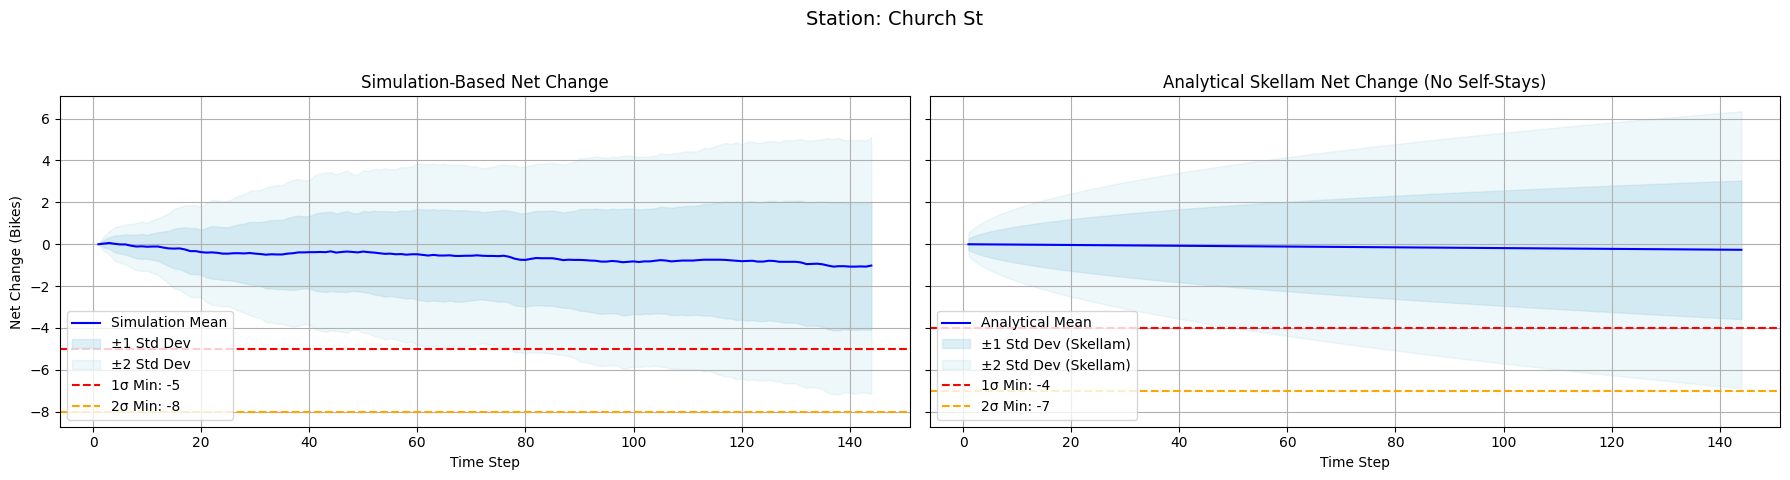

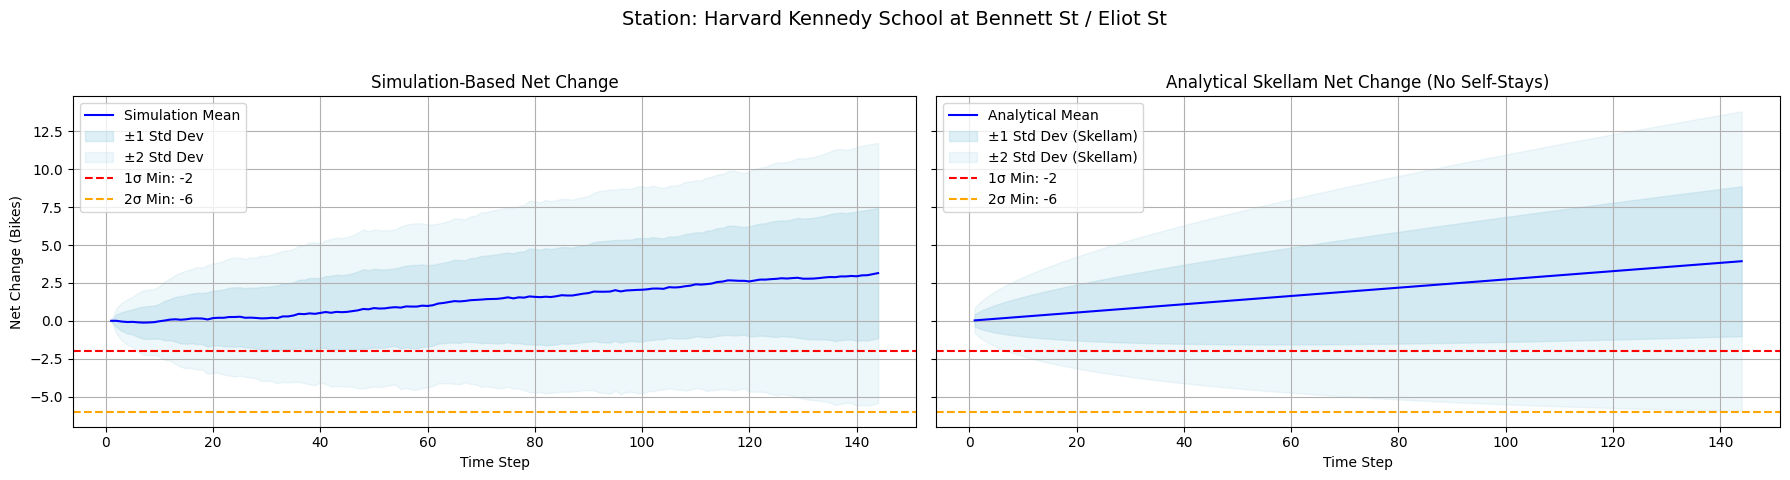

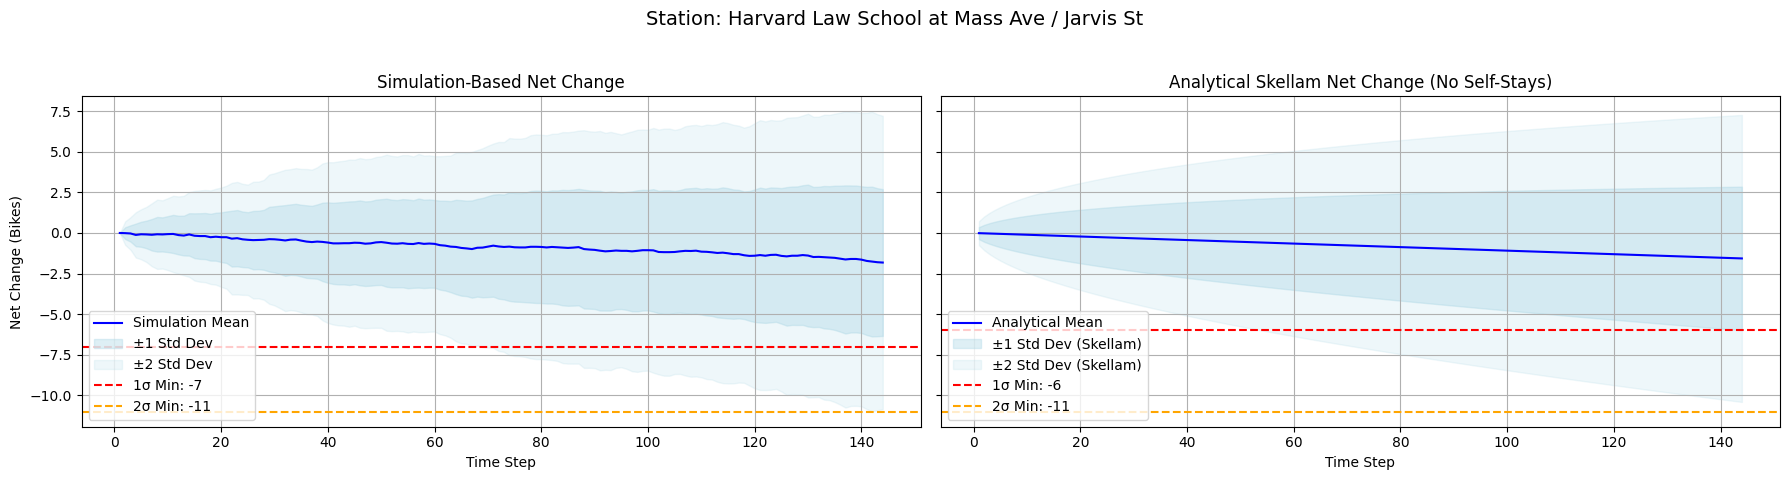

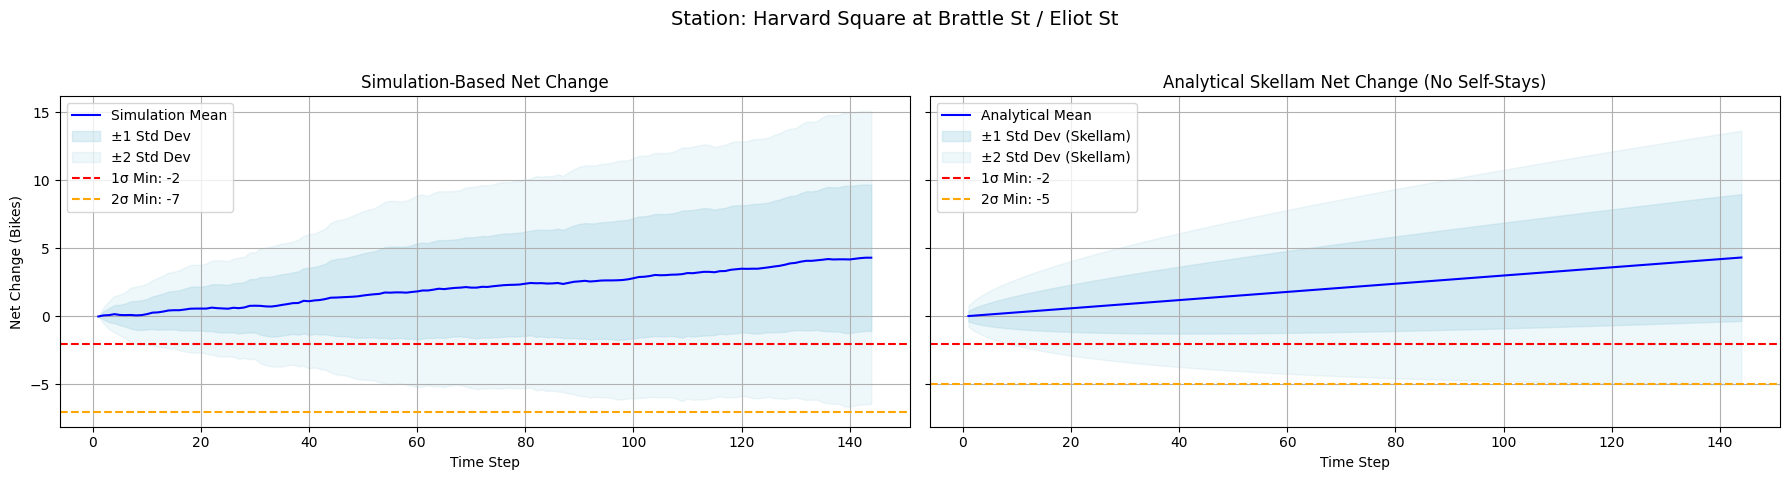

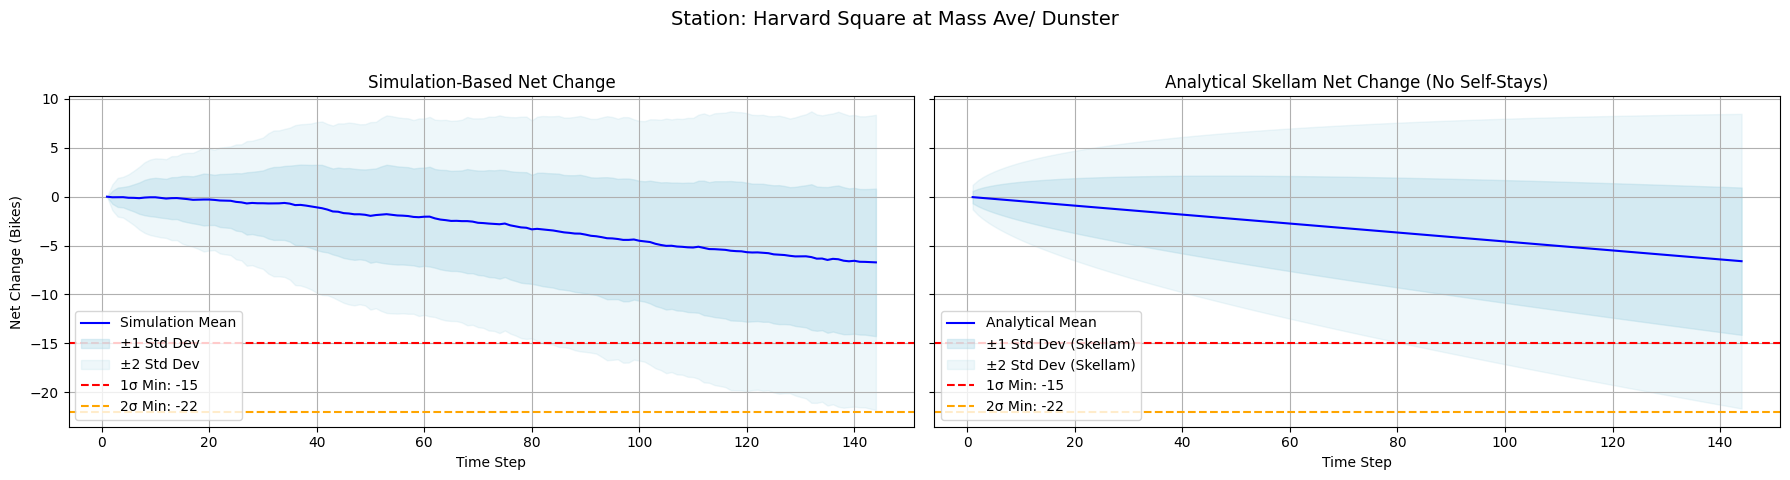

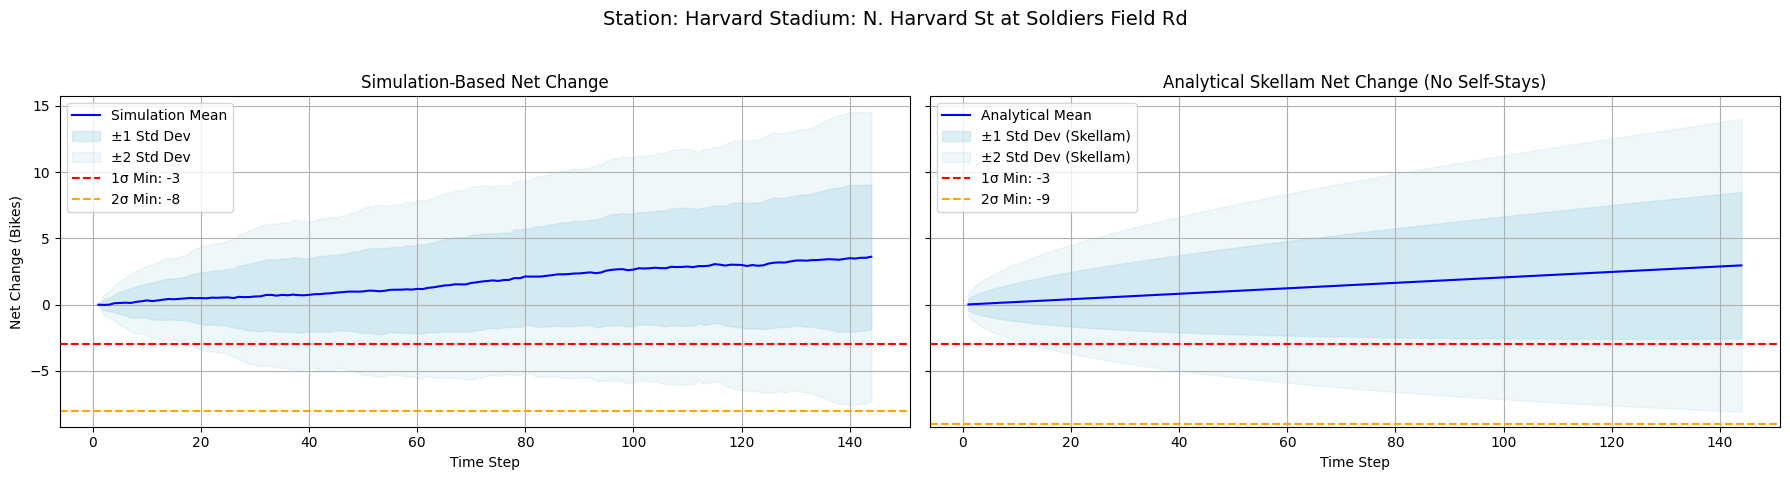

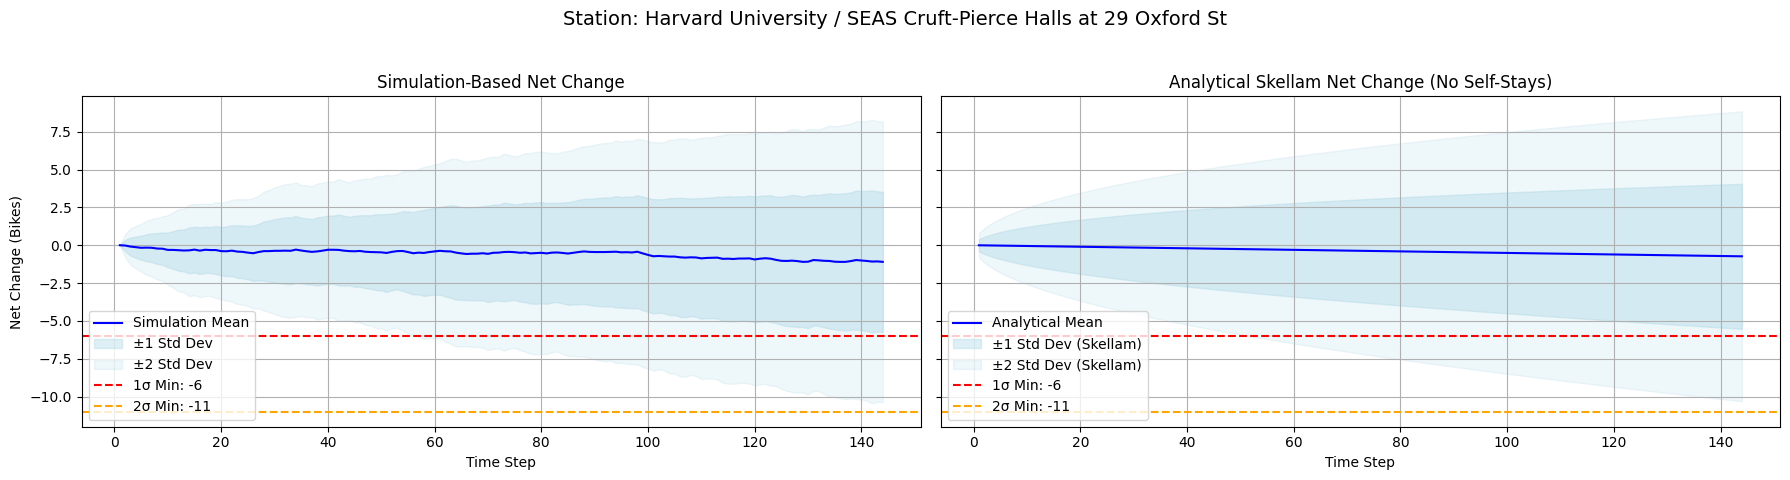

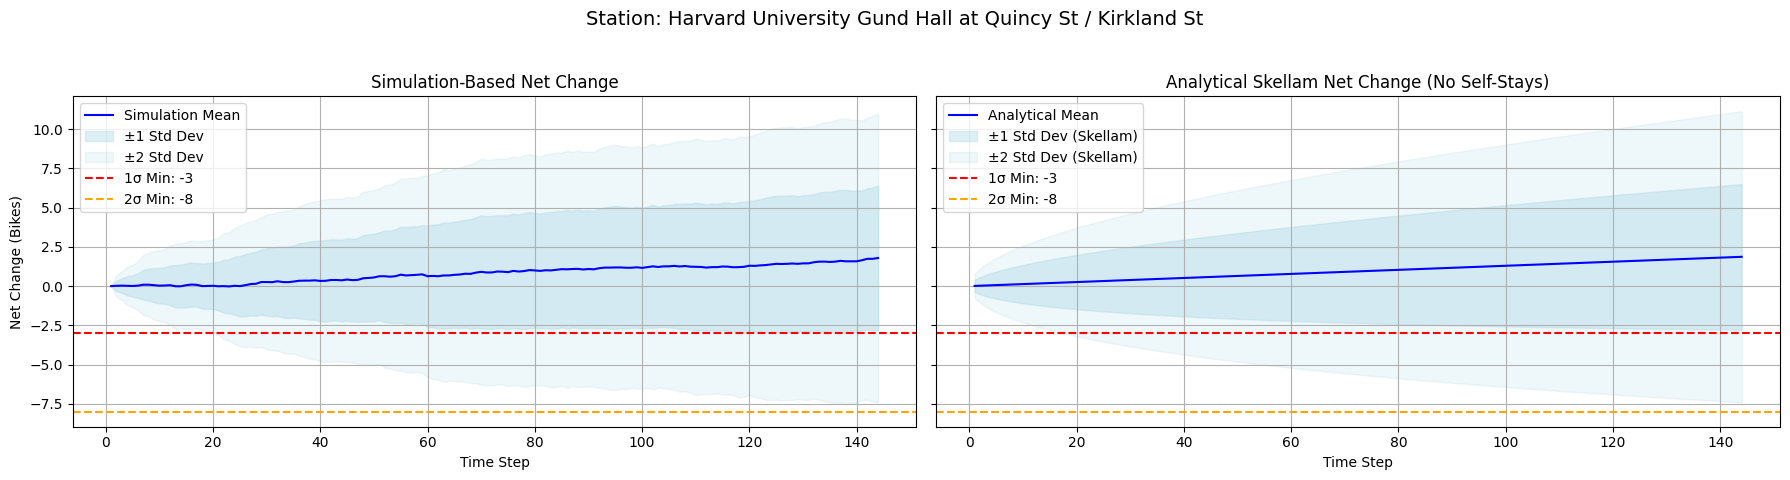

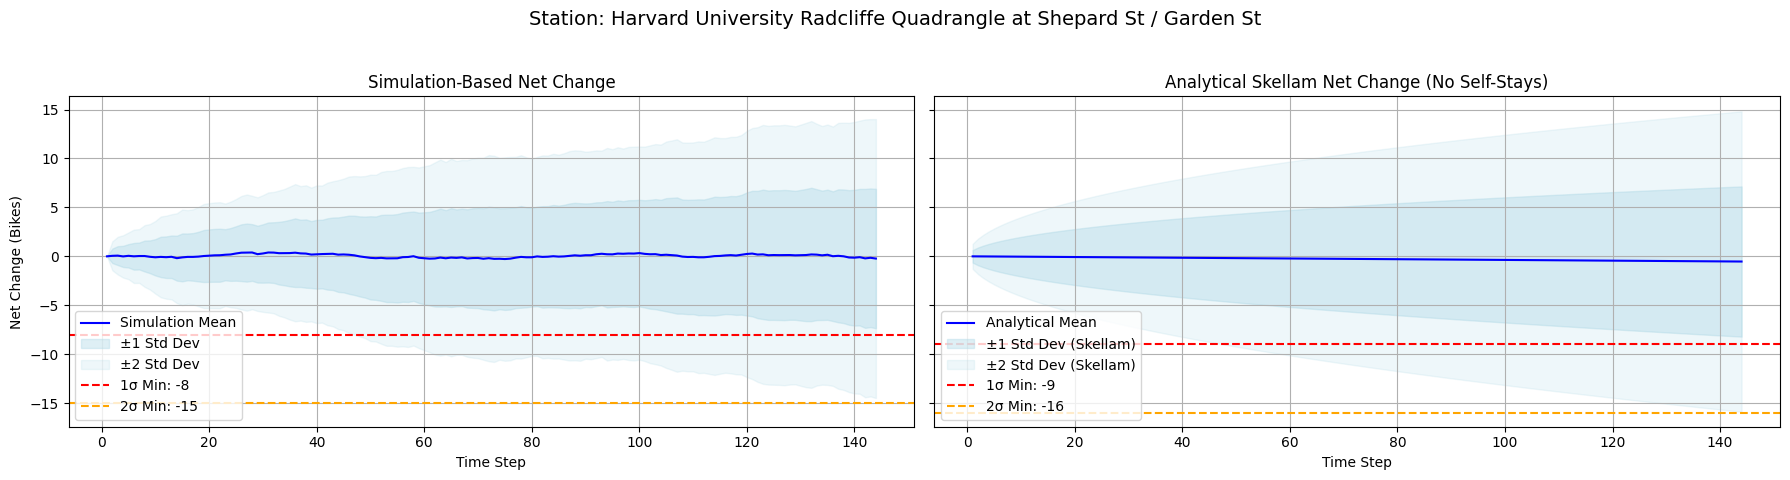

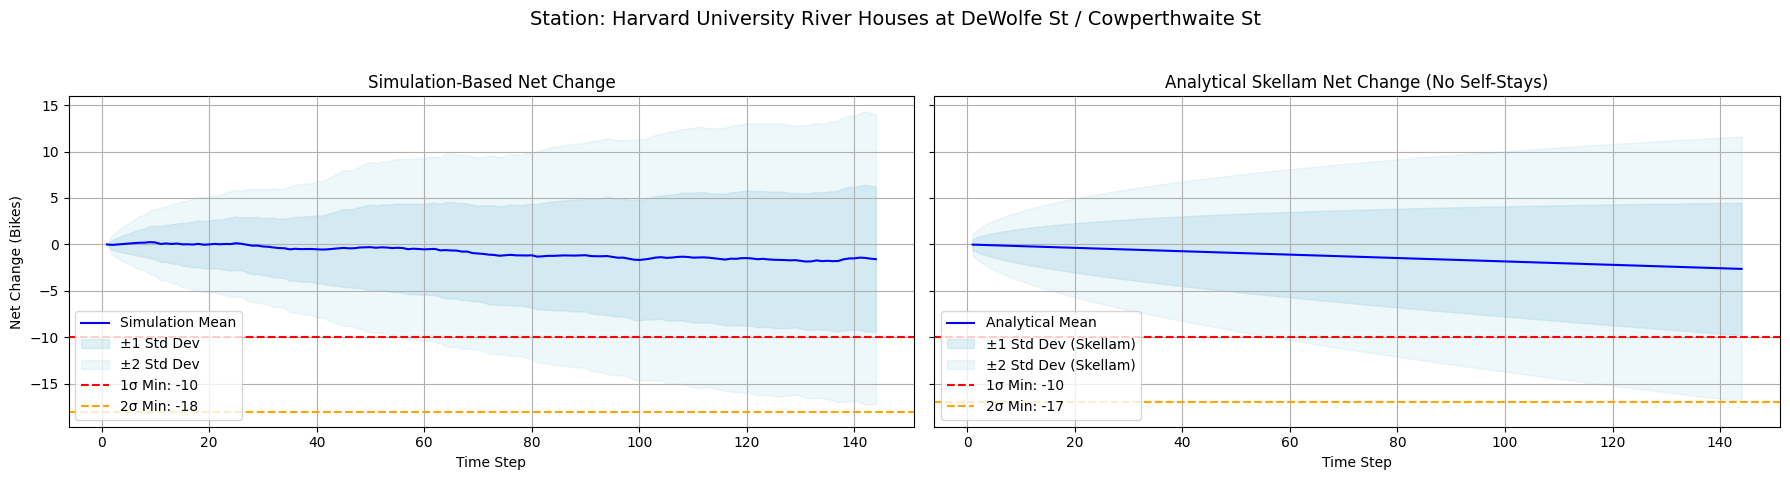

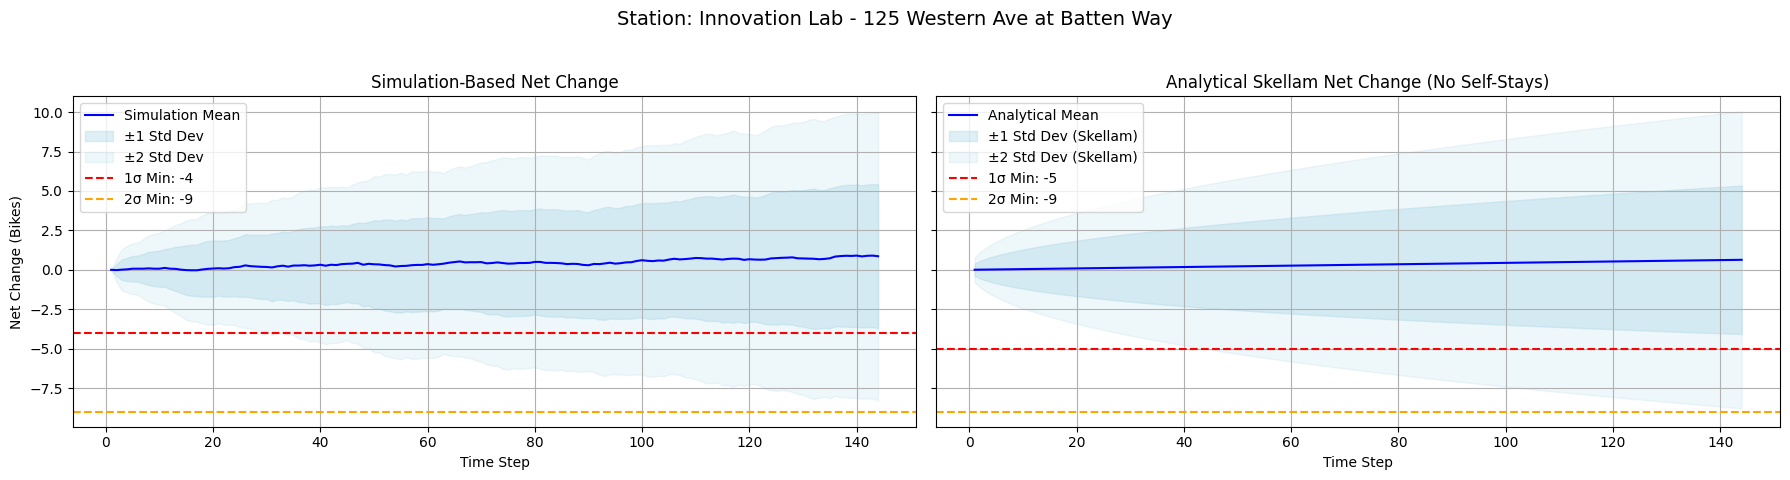

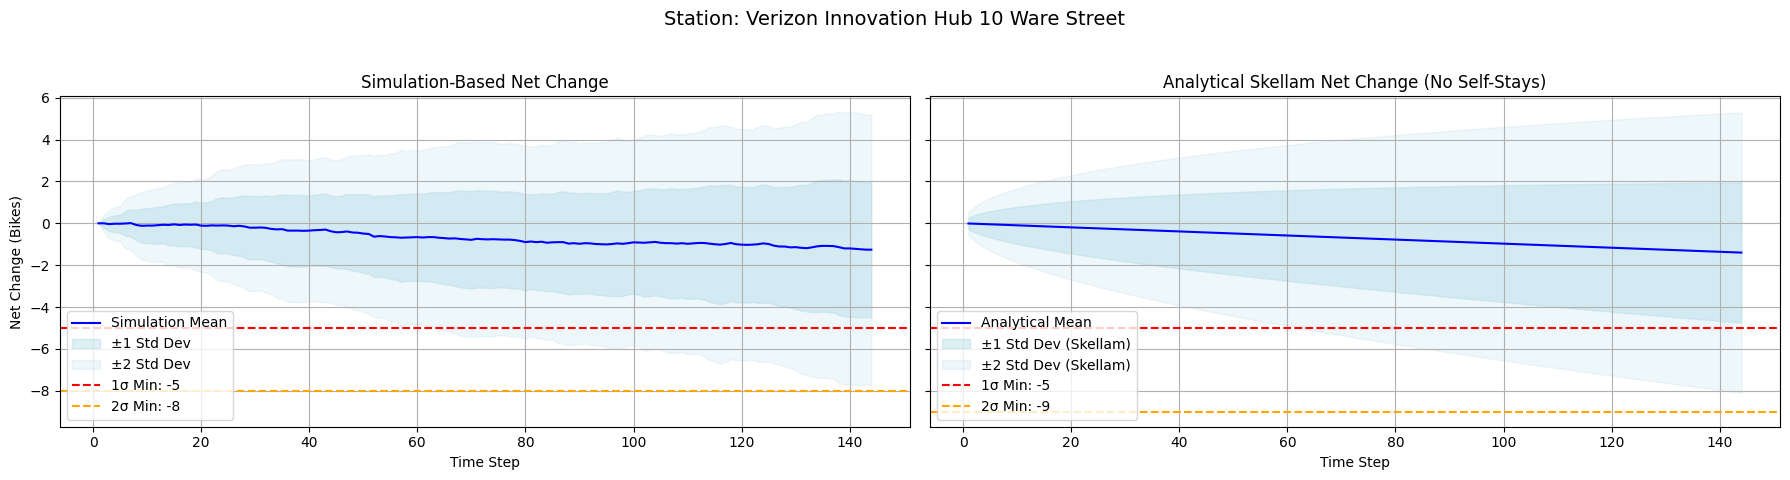

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

# === Assumed inputs ===
# - average_net_change: shape (SIM_TIME, NUM_STATIONS)
# - std_dev_net_change: shape (SIM_TIME, NUM_STATIONS)
# - final_transition_matrix: 12x12
# - lambdas: pd.Series (same order as transition matrix)
# - SIM_TIME and NUM_STATIONS defined

# === Step 1: Compute λ_i^+ and λ_i^- (Excluding diagonal self-stays)
inflow_matrix = final_transition_matrix.copy()
outflow_matrix = final_transition_matrix.copy()

np.fill_diagonal(inflow_matrix, 0)    # Exclude diagonal for inflow
np.fill_diagonal(outflow_matrix, 0)   # Exclude diagonal for outflow

lambda_plus = inflow_matrix.sum(axis=0)     # Inflow per station
lambda_minus = outflow_matrix.sum(axis=1)   # Outflow per station

# === Step 2: Create time steps
time_steps = np.arange(1, SIM_TIME + 1)

# === Step 3: Analytical mean and std dev (Skellam: no scaling)
mean_net_change_analytic = np.outer(time_steps, lambda_plus - lambda_minus)
skellam_variance = np.outer(time_steps, lambda_plus + lambda_minus)
std_net_change_analytic = np.sqrt(skellam_variance)

# === Step 4: Plot side-by-side for each station
for station_id in range(NUM_STATIONS):
    fig, axs = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

    # === Left: Simulation-Based ===
    sim_mean = average_net_change[:, station_id]
    sim_std = std_dev_net_change[:, station_id]
    sim_min_1std = floor((sim_mean - sim_std).min())
    sim_min_2std = floor((sim_mean - 2 * sim_std).min())

    axs[0].plot(time_steps, sim_mean, label="Simulation Mean", color='blue')
    axs[0].fill_between(time_steps, sim_mean - sim_std, sim_mean + sim_std, color='lightblue', alpha=0.4, label='±1 Std Dev')
    axs[0].fill_between(time_steps, sim_mean - 2 * sim_std, sim_mean + 2 * sim_std, color='lightblue', alpha=0.2, label='±2 Std Dev')
    axs[0].axhline(sim_min_1std, color='red', linestyle='--', label=f"1σ Min: {sim_min_1std}")
    axs[0].axhline(sim_min_2std, color='orange', linestyle='--', label=f"2σ Min: {sim_min_2std}")
    axs[0].set_title("Simulation-Based Net Change")
    axs[0].set_xlabel("Time Step")
    axs[0].set_ylabel("Net Change (Bikes)")
    axs[0].grid(True)
    axs[0].legend()

    # === Right: Skellam-Based Analytical ===
    ana_mean = mean_net_change_analytic[:, station_id]
    ana_std = std_net_change_analytic[:, station_id]
    ana_min_1std = floor((ana_mean - ana_std).min())
    ana_min_2std = floor((ana_mean - 2 * ana_std).min())

    axs[1].plot(time_steps, ana_mean, label="Analytical Mean", color='blue')
    axs[1].fill_between(time_steps, ana_mean - ana_std, ana_mean + ana_std, color='lightblue', alpha=0.4,
                        label='±1 Std Dev (Skellam)')
    axs[1].fill_between(time_steps, ana_mean - 2 * ana_std, ana_mean + 2 * ana_std, color='lightblue', alpha=0.2,
                        label='±2 Std Dev (Skellam)')
    axs[1].axhline(ana_min_1std, color='red', linestyle='--', label=f"1σ Min: {ana_min_1std}")
    axs[1].axhline(ana_min_2std, color='orange', linestyle='--', label=f"2σ Min: {ana_min_2std}")
    axs[1].set_title("Analytical Skellam Net Change (No Self-Stays)")
    axs[1].set_xlabel("Time Step")
    axs[1].grid(True)
    axs[1].legend()

    fig.suptitle(f"Station: {lambdas.index.tolist()[station_id]}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Bike-Constrained Optimization

As we found above, we can virtually avoid missed rentals with a supply of 131 bikes, as it covers the minimum of the two-deviation spread. But there's no guarantee we have that many bikes, or let alone the 70 that we found could reasonably cover missed rentals via the 1-deviation spread. Hence, we considered different approaches to best allocate some finite supply of bikes $B$, all of which didn't work.

1. Backwards Induction
  *   We could perform backwards induction assuming no bikes were initially assigned and allocate them as necessary when a renter arrives at a station with no bikes until we run out of $B$ bikes to allocate and average this across simulations, which is essentially inspecting the net change and covering for the spread given by its mean absolute deviation (MAD). This maximizes the time it takes until we encounter the first missed rental but doesn't minimize the number of missed rentals overall.

2. Grid Search
  *   Using stars and bars, there are $B + 11 \choose 11$ different ways of allocating these bikes. So the random points we select will almost certainly not be optimal, and we have no gradient to find a better one especially when we're dealing with an 12-dimensional vector.

3. Linear Program
  *   Even with the analytical solution, we're trying to minimize the CDF at a specific point in time where the spread is the lowest, which always happens to be at the end of the day. The CDF of a normal distribution can't be expressed using a linear equation, and using approximations are too complicated.

4. Binary Search for Standard Deviation
  *   This is the most reasonable of the "failed" approaches we chose for minimizing the number of missed rentals given a constraint on the number of bikes, similar to what we did for unconstrained optimization. We'd use binary search to find a standard deviation multiple our constraining number of bikes can cover (assuming we don't have enough bikes to cover the 2σ-spread). For example, I might have 60 bikes and my initial standard deviation bounds would (0, 2σ), so I try σ and find that I need 70 bikes (as calculated earlier), my right bound becomes σ and then I try σ/2 and continue recursing.
  *   The reason this approach isn't optimal is because each station's set of Skellam distributions have a different skew across time: we can't just assume they're approximately normal analytically.



**SOLUTION**

First of all, let's start by defining the deadweight loss of this system. If we look at our net change graph, it's all the area that falls below the negation of the number of bikes we allocate to that station $i$, which we will refer to as $B_i$. I give an example to visualize it below. But this area is obviously infinite, how do we minimize it? Well, we're not optimizing area but volume. It's a completely flat surface until we assign a height to it, and these values will be determined by the PDF of the Skellam distribution corresponding to that time step. Because the deadweight loss at each time step will lie entirely at the left tails of their correspoinding Skellam distribution with parameters $\lambda^+_i t$ and $\lambda^-_i t$ up to a constant net change value of $-B_i$, we can find the volume by taking the CDF of the distribution up to that point for each time step and summing them all together.

Of course, there are cascading effects if a station experiences missed rentals, as a station not sending out bikes means that they're expected to receive less bikes in return. The bikes that would optimally be passing through this station could be sitting at a less busy station and have lower probability of getting back in circulation. That's because the movement of bikes, and hence the net change of any given station, relies solely on the exogenous demand from renters, which is completely isolated from bike availability: just because a station has more bikes, it doesn't mean more people will want to take those bikes to ride, and this is reflected by the Poisson distributions for both arrivals and departures.

We use a greedy algorithm to minimize the deadweight loss. We start at an initial allocation of 0 bikes for each station and use our loss table, which are just precomputed loss values that we'll need to access freqeuntly, to consider the volume we gain by increasing any station's bike supply by 1 and choose to allocate to the bike with the greatest volume because this inherently minimizes deadweight loss. The code directly below represents this phenomenon visually and then the greedy algorithm code follows.

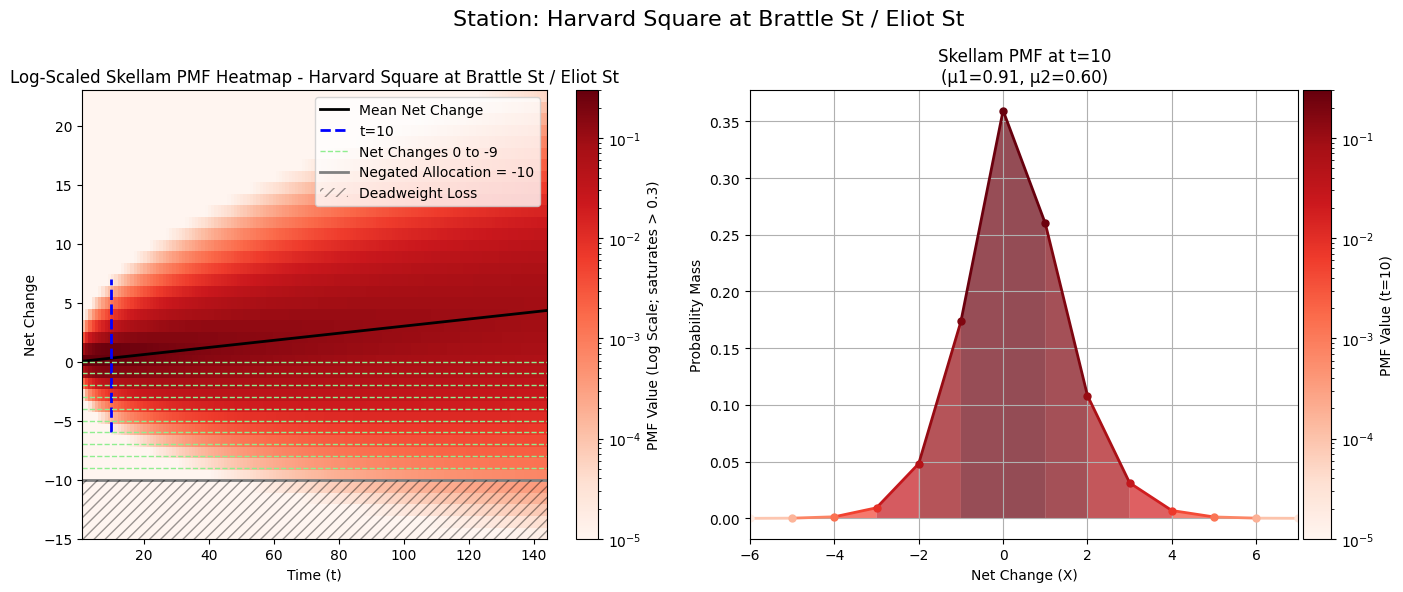

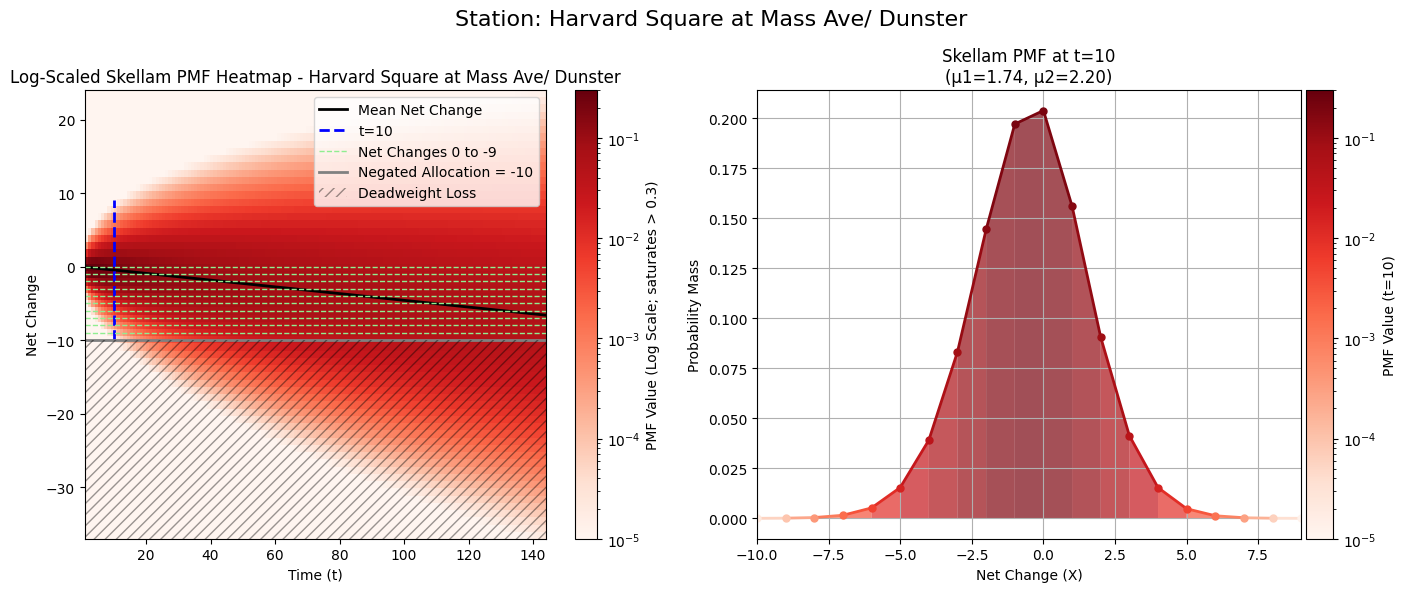

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil
from scipy.stats import skellam
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from matplotlib.collections import LineCollection, PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

# -------------------------------------------------------------------
# Assume these are defined:
# - final_transition_matrix: 12x12 matrix
# - lambdas: pandas Series or list of station names
# - SIM_TIME = 24 * 6
# -------------------------------------------------------------------

# STEP 1: Compute inflow/outflow rates (excluding self-stays)
inflow_matrix = final_transition_matrix.copy()
outflow_matrix = final_transition_matrix.copy()
np.fill_diagonal(inflow_matrix, 0)
np.fill_diagonal(outflow_matrix, 0)

lambda_plus = inflow_matrix.sum(axis=0)
lambda_minus = outflow_matrix.sum(axis=1)

def plot_heatmap(station_id):
  # STEP 2: Select Station 5
  station_name = lambdas.index[station_id - 1] if hasattr(lambdas, "index") else f"Station_{station_id}"

  mu_plus = lambda_plus[station_id - 1]
  mu_minus = lambda_minus[station_id - 1]

  # print(f"Station {station_name} — mu_plus: {mu_plus:.4f}, mu_minus: {mu_minus:.4f}")

  # STEP 3: Create time steps and net change range
  time_steps = np.arange(1, SIM_TIME + 1)

  max_mean = (mu_plus - mu_minus) * SIM_TIME
  max_std = np.sqrt((mu_plus + mu_minus) * SIM_TIME)

  netchange_min = int(floor(max_mean - 4 * max_std))
  netchange_max = int(ceil(max_mean + 4 * max_std))

  # Ensure some reasonable bounds
  netchange_min = min(netchange_min, -10)
  netchange_max = max(netchange_max, 5)

  possible_netchanges = np.arange(netchange_min, netchange_max + 1)
  Nn = len(possible_netchanges)

  # STEP 4: Build PMF matrix over time
  pmf_matrix = np.zeros((SIM_TIME, Nn))
  for t_idx, t in enumerate(time_steps):
      mu1 = mu_plus * t
      mu2 = mu_minus * t
      for j, x in enumerate(possible_netchanges):
          pmf_matrix[t_idx, j] = skellam.pmf(x, mu1, mu2)

  # Clamp very small values to avoid log(0)
  pmf_matrix[pmf_matrix <= 1e-10] = 1e-10

  # STEP 5: Mean net change
  mean_line = (mu_plus - mu_minus) * time_steps

  # Choose time for single slice
  t_chosen = 10
  mu1_chosen = mu_plus * t_chosen
  mu2_chosen = mu_minus * t_chosen
  pmf_chosen = pmf_matrix[t_chosen - 1, :]  # index is t_chosen - 1

  # STEP 6: Plot
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

  # Define a single, global color norm and cmap
  norm = LogNorm(vmin=1e-5, vmax=0.3)
  cmap = plt.cm.Reds

  # === LEFT PLOT: Heatmap with annotations ===
  im = ax1.imshow(
      pmf_matrix.T,
      origin='lower',
      aspect='auto',
      extent=[1, SIM_TIME, netchange_min, netchange_max],
      cmap=cmap,
      norm=norm
  )

  ax1.set_title(f"Log-Scaled Skellam PMF Heatmap - {station_name}")
  ax1.set_xlabel("Time (t)")
  ax1.set_ylabel("Net Change")

  # Mean net change line (black)
  ax1.plot(time_steps, mean_line, color='black', lw=2, label='Mean Net Change')

  # Vertical line at t = 10
  # Determine visible y-range (based on where PMF at t=5 is "significant")
  pmf_threshold = 1e-5  # anything below this is considered visually negligible
  visible_y_vals = possible_netchanges[pmf_chosen > pmf_threshold]

  if len(visible_y_vals) > 0:
      y_min_visible = visible_y_vals.min()
      y_max_visible = visible_y_vals.max()
  else:
      y_min_visible = netchange_min
      y_max_visible = netchange_max

  # Now add a vertical line constrained to that y-range
  ax1.plot(
      [t_chosen, t_chosen],
      [y_min_visible, y_max_visible],
      color='blue',
      linestyle='--',
      lw=2,
      label=f"t={t_chosen}"
  )

  # Horizontal dashed lines from 0 to -9
  dashed_label_added = False
  for y in range(0, -10, -1):
      if not dashed_label_added:
          ax1.axhline(y=y, color='lightgreen', linestyle='--', lw=1, label='Net Changes 0 to -9')
          dashed_label_added = True
      else:
          ax1.axhline(y=y, color='lightgreen', linestyle='--', lw=1)

  # Solid line at net = -10
  ax1.axhline(y=-10, color='gray', lw=2, label='Negated Allocation = -10')

  # Crosshatched region below -10 = Deadweight Loss
  rect = patches.Rectangle(
      (1, netchange_min),
      SIM_TIME - 1,
      -10 - netchange_min,
      hatch='///',
      facecolor='none',
      edgecolor='black',
      linewidth=0,
      alpha=0.4,
      label='Deadweight Loss',
      zorder=3
  )
  ax1.add_patch(rect)

  # Colorbar
  cb = fig.colorbar(im, ax=ax1)
  cb.set_label("PMF Value (Log Scale; saturates > 0.3)")

  # Legend
  ax1.legend(loc="upper right")
  ax1.grid(False)

  from matplotlib.collections import LineCollection
  from mpl_toolkits.axes_grid1 import make_axes_locatable

  # === RIGHT PLOT: Skellam PMF at t = 5 with gradient line ===

  # Use same normalization and colormap
  colors = cmap(norm(pmf_chosen))

  x_vals = possible_netchanges
  y_vals = pmf_chosen

  # Gradient LINE using LineCollection
  points = np.array([x_vals, y_vals]).T.reshape(-1, 1, 2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1)
  pmf_segment_vals = (y_vals[:-1] + y_vals[1:]) / 2

  lc = LineCollection(segments, cmap=cmap, norm=norm)
  lc.set_array(pmf_segment_vals)
  lc.set_linewidth(2)

  # Gradient FILLED AREA using PolyCollection
  verts = []
  colors_fill = []
  for i in range(len(x_vals) - 1):
      x0, x1 = x_vals[i], x_vals[i+1]
      y0, y1 = y_vals[i], y_vals[i+1]
      verts.append([(x0, 0), (x0, y0), (x1, y1), (x1, 0)])
      avg_pmf = (y0 + y1) / 2
      colors_fill.append(cmap(norm(avg_pmf)))

  poly = PolyCollection(verts, facecolors=colors_fill, edgecolors='none', alpha=0.7)

  # Plot everything
  ax2.add_collection(poly)         # gradient fill
  ax2.add_collection(lc)           # gradient line

  # Colored dots
  for x_val, y_val, color in zip(x_vals, y_vals, colors):
      ax2.plot(x_val, y_val, marker='o', color=color, markersize=5)

  # Axes formatting
  ax2.set_title(f"Skellam PMF at t={t_chosen}\n(μ1={mu1_chosen:.2f}, μ2={mu2_chosen:.2f})")
  ax2.set_xlabel("Net Change (X)")
  ax2.set_ylabel("Probability Mass")
  ax2.set_xlim(y_min_visible, y_max_visible)
  ax2.grid(True)

  # Colorbar
  divider = make_axes_locatable(ax2)
  cax = divider.append_axes("right", size="5%", pad=0.05)

  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  cbar = fig.colorbar(sm, cax=cax)
  cbar.set_label('PMF Value (t=10)')

  fig.suptitle(f"Station: {station_name}", fontsize=16)
  plt.tight_layout()
  plt.show()

plot_heatmap(4)
plot_heatmap(5)

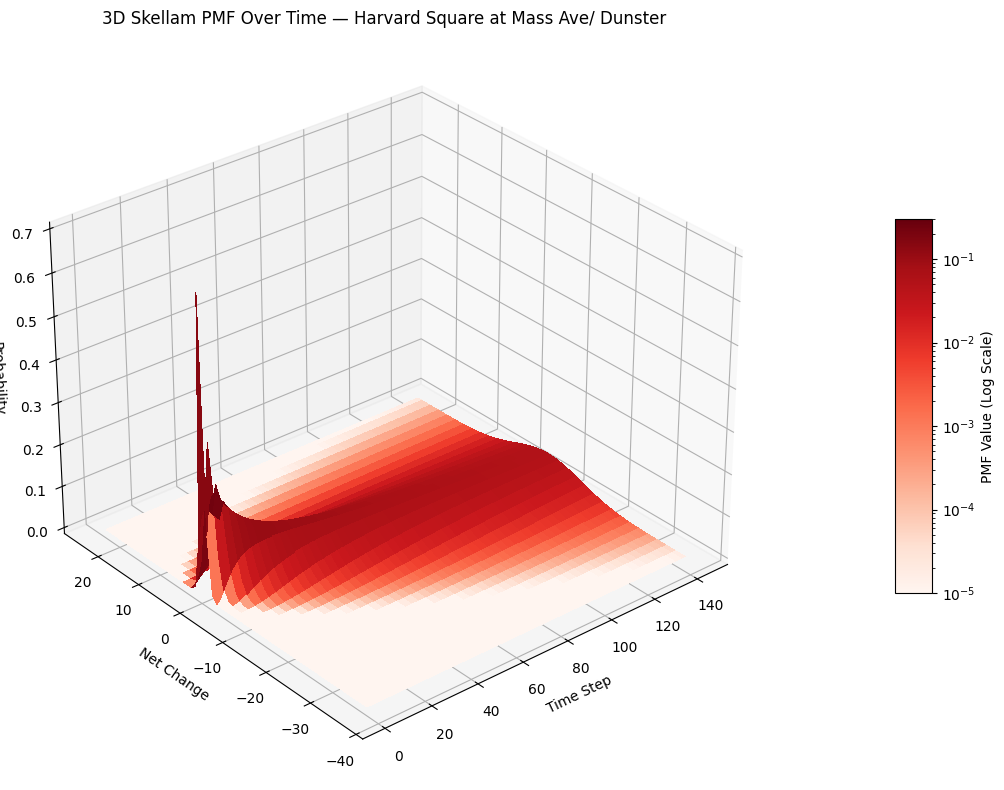

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_distribution(station_id):
    station_name = lambdas.index[station_id - 1] if hasattr(lambdas, "index") else f"Station_{station_id}"

    mu_plus = lambda_plus[station_id - 1]
    mu_minus = lambda_minus[station_id - 1]

    time_steps = np.arange(1, SIM_TIME + 1)
    max_mean = (mu_plus - mu_minus) * SIM_TIME
    max_std = np.sqrt((mu_plus + mu_minus) * SIM_TIME)

    netchange_min = int(floor(max_mean - 4 * max_std))
    netchange_max = int(ceil(max_mean + 4 * max_std))
    netchange_min = min(netchange_min, -10)
    netchange_max = max(netchange_max, 5)

    possible_netchanges = np.arange(netchange_min, netchange_max + 1)
    Nn = len(possible_netchanges)

    # STEP: Build PMF matrix over time
    pmf_matrix = np.zeros((SIM_TIME, Nn))
    for t_idx, t in enumerate(time_steps):
        mu1 = mu_plus * t
        mu2 = mu_minus * t
        for j, x in enumerate(possible_netchanges):
            pmf_matrix[t_idx, j] = skellam.pmf(x, mu1, mu2)

    # Clamp very small values for log norm display
    pmf_matrix[pmf_matrix <= 1e-10] = 1e-10

    # Create meshgrid
    T, X = np.meshgrid(time_steps, possible_netchanges)
    Z = pmf_matrix.T  # shape (netchange, time)

    # Plot
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')

    norm = LogNorm(vmin=1e-5, vmax=0.3)
    cmap = plt.cm.Reds
    face_colors = cmap(norm(Z))

    surf = ax.plot_surface(T, X, Z, facecolors=face_colors, linewidth=0, antialiased=False, shade=False)

    m = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    m.set_array(Z)
    fig.colorbar(m, ax=ax, shrink=0.5, aspect=10, pad=0.1, label="PMF Value (Log Scale)")

    ax.set_title(f"3D Skellam PMF Over Time — {station_name}")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Net Change")
    ax.set_zlabel("Probability")

    ax.view_init(elev=30, azim=230)  # Adjust angle if needed
    plt.tight_layout()
    plt.show()

plot_3d_distribution(5)

In [ ]:
from scipy.stats import skellam

def compute_loss(B_i, lambda_plus_i, lambda_minus_i, T):
    loss = 0
    for t in range(1, T + 1):
        mu1 = lambda_plus_i * t
        mu2 = lambda_minus_i * t
        loss += skellam.cdf(-B_i - 1, mu1, mu2)  # P(X < -B_i)
    return loss

def greedy_bike_allocation(B_total, lambda_plus, lambda_minus, T):
    N = len(lambda_plus)
    B = np.zeros(N, dtype=int)

    # Precompute a loss table up to some max B_i per station (optional speed-up)
    MAX_BIKE_PER_STATION = B_total  # or some reasonable upper bound
    loss_table = [[compute_loss(b, lambda_plus[i], lambda_minus[i], T)
                   for b in range(MAX_BIKE_PER_STATION + 2)]
                  for i in range(N)]

    for _ in range(B_total):
        best_improvement = -np.inf
        best_station = None

        for i in range(N):
            curr_B = B[i]
            if curr_B + 1 <= MAX_BIKE_PER_STATION:
                loss_now = loss_table[i][curr_B]
                loss_next = loss_table[i][curr_B + 1]
                delta = loss_now - loss_next
                if delta > best_improvement:
                    best_improvement = delta
                    best_station = i

        B[best_station] += 1

    return B

## Profit-Constrained Optimization

In [ ]:
import numpy as np
from scipy.stats import skellam
from collections import defaultdict

def precompute_loss_table(lambda_plus, lambda_minus, max_bikes, T):
    N = len(lambda_plus)
    loss_table = [
        [compute_loss(b, lambda_plus[i], lambda_minus[i], T) for b in range(max_bikes + 2)]
        for i in range(N)
    ]
    return loss_table

def build_all_greedy_allocations(max_total_bikes, lambda_plus, lambda_minus, T):
    N = len(lambda_plus)
    loss_table = precompute_loss_table(lambda_plus, lambda_minus, max_total_bikes, T)

    # Store optimal allocations for each total number of bikes
    optimal_s0s = defaultdict(lambda: np.zeros(N, dtype=int))
    B = np.zeros(N, dtype=int)

    for total_bikes in range(1, max_total_bikes + 1):
        best_improvement = -np.inf
        best_station = None

        for i in range(N):
            curr_B = B[i]
            loss_now = loss_table[i][curr_B]
            loss_next = loss_table[i][curr_B + 1]
            delta = loss_now - loss_next
            if delta > best_improvement:
                best_improvement = delta
                best_station = i

        B[best_station] += 1
        optimal_s0s[total_bikes] = B.copy()

    return optimal_s0s

# Convert lambdas from transition matrix
lambda_plus = inflow_matrix.sum(axis=0)
lambda_minus = outflow_matrix.sum(axis=1)

# Total number of bikes to distribute
TOTAL_BIKES_LIST = [74, 89, 104, 119, 133]
max_bikes = max(TOTAL_BIKES_LIST)

# Build all allocations up to max
optimal_s0s = build_all_greedy_allocations(
    max_total_bikes=max_bikes,
    lambda_plus=lambda_plus,
    lambda_minus=lambda_minus,
    T=SIM_TIME
)

# Print only selected ones
for b in TOTAL_BIKES_LIST:
    print(f"Optimal Allocation for {b} Total Bikes:\n{optimal_s0s[b].T}")

# Access all in optimal_s0s as needed
print("Cached optimal allocations:\n", dict(optimal_s0s))

Optimal Allocation for 74 Total Bikes:
[ 5  4  7  3 12  5  6  5  8  9  5  5]
Optimal Allocation for 89 Total Bikes:
[ 5  5  8  4 14  6  8  6 10 11  6  6]
Optimal Allocation for 104 Total Bikes:
[ 6  6  9  5 16  7  9  7 12 13  7  7]
Optimal Allocation for 119 Total Bikes:
[ 7  7 10  6 18  8 10  7 14 15  9  8]
Optimal Allocation for 133 Total Bikes:
[ 8  8 11  7 20  9 11  8 16 16 10  9]
Cached optimal allocations:
 {1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 2: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 3: array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 4: array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]), 5: array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]), 6: array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2]), 7: array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2]), 8: array([1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2]), 9: array([2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2]), 10: array([2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2]), 11: array([2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2]), 12: array([2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2]), 13:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# ================================
# PARAMETERS & CONFIGURATION
# ================================
REVENUE_PER_RIDE = 5.50
NUM_RUNS = 100
KEY_BIKE_COUNTS = [74, 89, 104, 119, 133]  # vertical lines
n = NUM_RUNS  # for CI calculation

# This assumes you already have:
# - optimal_s0s: dict mapping total_bikes -> allocation array (np.ndarray)
# - lambdas: arrival rates, np.ndarray or pd.Series
# - transition_matrix: np.ndarray (shape: NUM_STATIONS x NUM_STATIONS)
# - SIM_TIME: int

# ================================
# SIMULATION LOOP (per bike count)
# ================================
bike_counts_sorted = sorted(optimal_s0s.keys())
num_scenarios = len(bike_counts_sorted)

earned_revs = np.zeros((num_scenarios, NUM_RUNS))
missed_revs = np.zeros((num_scenarios, NUM_RUNS))

for scenario_idx, total_bikes in enumerate(bike_counts_sorted):
    print(f"Running 100 simulations for {total_bikes} bikes...")

    allocation = optimal_s0s[total_bikes]
    N = len(allocation)

    for run in range(NUM_RUNS):
        station_states = allocation.copy()
        earned = 0.0
        missed = 0

        for t in range(SIM_TIME):
            for i in range(N):
                renter_arrival = np.random.poisson(lambdas[i])
                if renter_arrival > 0:
                    bikes_available = station_states[i]
                    successes = min(renter_arrival, bikes_available)
                    fails = renter_arrival - successes

                    station_states[i] -= successes
                    earned += successes * REVENUE_PER_RIDE
                    missed += fails

                    if successes > 0:
                        dest_counts = np.random.multinomial(successes, transition_matrix[i])
                        for j in range(N):
                            station_states[j] += dest_counts[j]

        earned_revs[scenario_idx, run] = earned
        missed_revs[scenario_idx, run] = missed * REVENUE_PER_RIDE

# ================================
# STATS & CONFIDENCE INTERVALS
# ================================
mean_earned = earned_revs.mean(axis=1)
std_earned = earned_revs.std(axis=1, ddof=1)
ci_earned = 1.96 * std_earned / np.sqrt(n)
lower_earned = mean_earned - ci_earned
upper_earned = mean_earned + ci_earned

mean_missed = missed_revs.mean(axis=1)
std_missed = missed_revs.std(axis=1, ddof=1)
ci_missed = 1.96 * std_missed / np.sqrt(n)
lower_missed = mean_missed - ci_missed
upper_missed = mean_missed + ci_missed

Running 100 simulations for 1 bikes...


<ipython-input-275-84891dee96a6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renter_arrival = np.random.poisson(lambdas[i])


Running 100 simulations for 2 bikes...
Running 100 simulations for 3 bikes...
Running 100 simulations for 4 bikes...
Running 100 simulations for 5 bikes...
Running 100 simulations for 6 bikes...
Running 100 simulations for 7 bikes...
Running 100 simulations for 8 bikes...
Running 100 simulations for 9 bikes...
Running 100 simulations for 10 bikes...
Running 100 simulations for 11 bikes...
Running 100 simulations for 12 bikes...
Running 100 simulations for 13 bikes...
Running 100 simulations for 14 bikes...
Running 100 simulations for 15 bikes...
Running 100 simulations for 16 bikes...
Running 100 simulations for 17 bikes...
Running 100 simulations for 18 bikes...
Running 100 simulations for 19 bikes...
Running 100 simulations for 20 bikes...
Running 100 simulations for 21 bikes...
Running 100 simulations for 22 bikes...
Running 100 simulations for 23 bikes...
Running 100 simulations for 24 bikes...
Running 100 simulations for 25 bikes...
Running 100 simulations for 26 bikes...
Running 

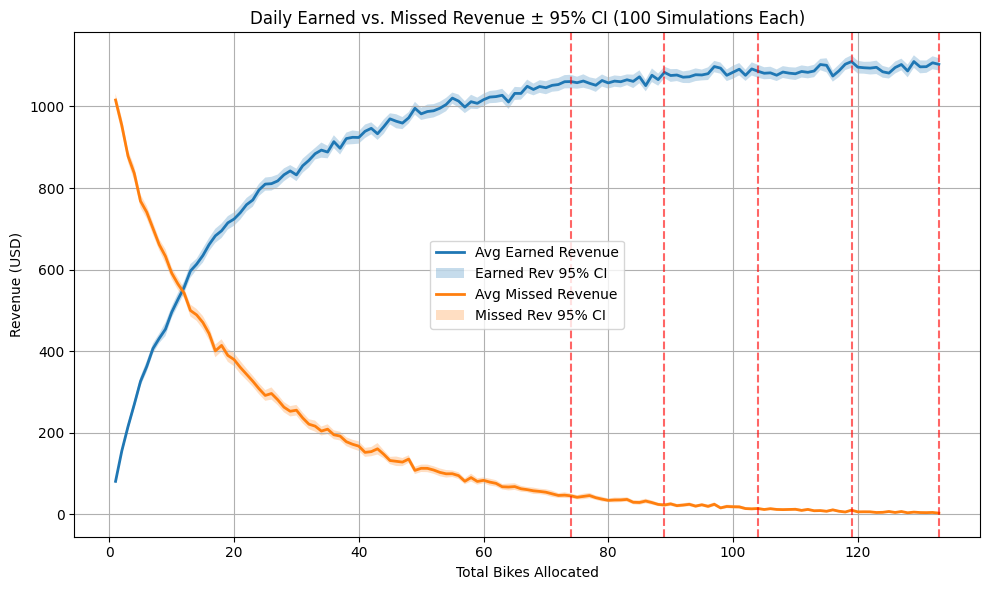

In [ ]:
# ================================
# PLOTTING
# ================================
plt.figure(figsize=(10, 6))

# Plot earned revenue with CI
plt.plot(bike_counts_sorted, mean_earned, label='Avg Earned Revenue', linewidth=2)
plt.fill_between(bike_counts_sorted, lower_earned, upper_earned, alpha=0.25, label='Earned Rev 95% CI')

# Plot missed revenue with CI
plt.plot(bike_counts_sorted, mean_missed, label='Avg Missed Revenue', linewidth=2)
plt.fill_between(bike_counts_sorted, lower_missed, upper_missed, alpha=0.25, label='Missed Rev 95% CI')

# Vertical lines at key points
for x in KEY_BIKE_COUNTS:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6)

plt.xlabel('Total Bikes Allocated')
plt.ylabel('Revenue (USD)')
plt.title('Daily Earned vs. Missed Revenue ± 95% CI (100 Simulations Each)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Possible Extension #1: Open System

**MOTIVATION**: We're only tracking trips between stations of interests, which is unrealistic

Find what percentage of trips happen between Harvard stations compared to adjacent to them

**SOLUTION**: We introduce a new state for non-Harvard stations, make a 13x13 transition matrix

Findings would be more reflective of the initial number of BlueBikes required in real life, but the entire process would be repetitive.

# Possible Extension #2: Introducing Travel Times

**MOTIVATION**:
1.   Travel time isn't constant (isn't always 10 minutes)
2.   We're not capturing missed transactions due to bikes being on the road

Going to relax these two assumptions:
*  Trips happen concurrently and *take one time step* (10 minutes)
*  Demand is uniform throughout the month
  *   Doesn't matter for our base model, we're not considering time

**SOLUTION**:

1. **New Model**

  Specifications:
  *   Model type: Semi-Markov chain
    -   A generalization of a Markov chain where the time spent in each state before transitioning to the next state follows an arbitrary distribution, relaxing the traditional assumption of exponential/geometric holding times
  *   States:
    1. Harvard stations (and outside stations state)
    2. Road states for each station
  *   State variables: Number of bikes available at each station/road state
  *   Agents: Renters, arriving in a Poisson process
  *   Actions:
    1. Bike in a station can go to any road state, even its own
    2. Bike in a road state must go to its corresponding station
  *   Transition matrix: Based on trip data from last year, April 2024
  *   Trip duration:
    *   Would have to assume that trip duration is normally distributed for simplicity
    *   Randomly sampled based on average time and standard deviation matrices
  *   Time: discrete, in minutes

2. Arrival rates (lambdas) are a function of time
  *   Expect more people to take BlueBikes during rush hours followed by business hours compared to early morning and late night hours
  *   We would also need to come up with a distribution for this as well

Assumptions:
1.  Renters don't wait for a bike once they arrive: they leave and find an alternative, e.g., call a Uber, take the T, walk instead, etc.
  *   Super important, we only get one chance
2.  Still going to ignore the case where there's no dock at a station

Further extension: Giving renters a preference between classic and electric bikes
  *   Expect travel time to differ depending on whether you're riding a classic or electric bike